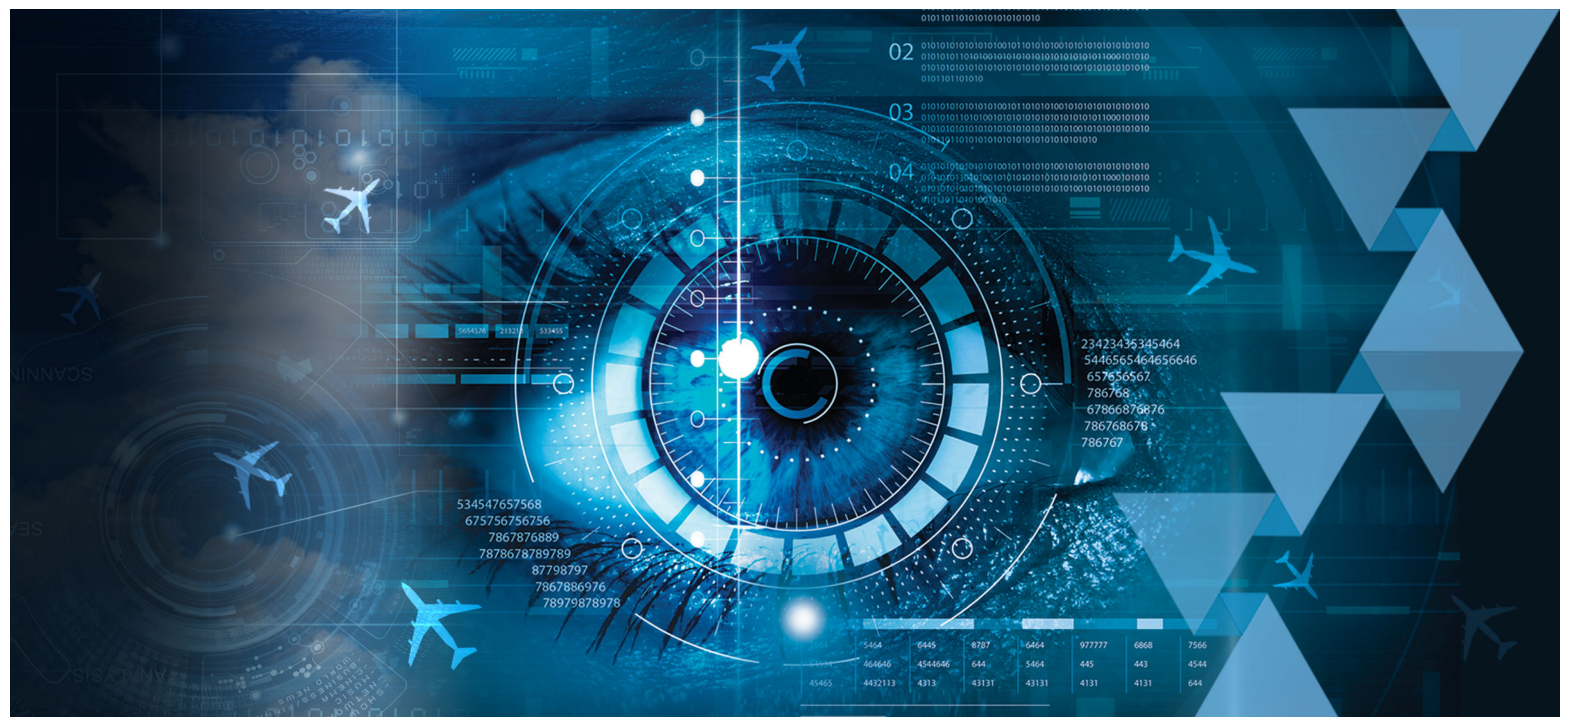

In [10]:
Imagen("IMAGENES\IA_0.jpg", (20,10))

# <h1 align=center> **CONECTIVIDAD AÉREA ARGENTINA** </h1>
-----------------------------------------------------

# <h1 align=center> **INFORME PRELIMINAR** </h1>
-------------------------------------------

# **1.- FUENTE DE INFORMACIÓN. INSTALACIÓN DE LIBRERIAS Y DEPENDENCIAS.**

#### FUENTE DE INFORMACIÓN.

Las bases de datos analizadas en el presente proyecto han sido extraidas del siguiente sitio web oficial: 



- https://datos.gob.ar/dataset/turismo-conectividad-aerea


#### LIBRERIAS Y DEPENDENCIAS.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import missingno as msno
from collections import Counter
import re
import csv
from datetime import datetime
import os
import matplotlib.image as mpimg
from funciones import *


# **2.- APERTURA DE LOS DATASETS.**

In [2]:
archivo = r'aerolineas_por_trimestre.csv'
AEROLINEASPORTRIMESTRE = pd.read_csv(archivo)
AEROLINEASPORTRIMESTRE.head(5)

fecha  aerolineas
0  2017-01-01          32
1  2017-04-01          35
2  2017-07-01          33
3  2017-10-01          34
4  2018-01-01          37

In [3]:
AEROLINEASPORTRIMESTRE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   fecha       30 non-null     object
 1   aerolineas  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 612.0+ bytes


In [4]:
archivo = r'aeropuertos_detalle.csv'
archivo_corregido = r'aeropuertos_detalle_corregido.csv'
with open(archivo, 'r', encoding='utf-8') as infile, open(archivo_corregido, 'w', encoding='utf-8') as outfile:
    for i, line in enumerate(infile):
        if i == 243:  
            line = line.replace(',', ';')
        outfile.write(line)
AEROPUERTOSDETALLES = pd.read_csv(archivo_corregido, sep=';', on_bad_lines='skip')
AEROPUERTOSDETALLES.head(5)


local  oaci iata       tipo                       denominacion  \
0   ACB   NaN  NaN  Aeródromo       CORONEL BOGADO/AGROSERVICIOS   
1   ACH   NaN  NaN  Aeródromo                       GENERAL ACHA   
2   ACM   NaN  NaN  Aeródromo            ARRECIFES/LA CURA MALAL   
3   ADO  SAWD  PUD  Aeródromo                     PUERTO DESEADO   
4   ADT   NaN  NaN  Aeródromo  BANDERA/AGROSERVICIOS DOÑA TERESA   

              coordenadas   latitud  longitud   elev uom_elev  ... condicion  \
0  33°16'20"S  60°34'14"W -60.57066 -33.27226   44.0   Metros  ...   PRIVADO   
1  37°24' 6"S  64°36'49"W -64.61351 -37.40164  277.0   Metros  ...   PUBLICO   
2  34° 4'33"S  60° 8'30"W -60.14170 -34.07574   37.0   Metros  ...   PRIVADO   
3  47°44' 6"S  65°54'15"W -65.90410 -47.73511   82.0   Metros  ...   PUBLICO   
4  28°51'19"S  62°15'53"W -62.26462 -28.85541   75.0   Metros  ...   PRIVADO   

     control region   fir      uso   trafico sna concesionado  \
0  NOCONTROL   RACE  SAEF  AEROAPP  Nacional  NO           NO   
1  NOCONTROL   RACE  SAEF    CIVIL  Nacional  NO           NO   
2  NOCONTROL   RACE  SAEF    CIVIL  Nacional  NO           NO   
3    AERADIO   RASU  SAVF    CIVIL  Nacional  NO           NO   
4  NOCONTROL   RANO  SACF  AEROAPP  Nacional  NO           NO   

             provincia inhab  
0             SANTA FÉ    NO  
1             LA PAMPA    NO  
2         BUENOS AIRES    NO  
3           SANTA CRUZ    NO  
4  SANTIAGO DEL ESTERO    NO  

[5 rows x 23 columns]

In [5]:
AEROPUERTOSDETALLES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   local          693 non-null    object 
 1   oaci           124 non-null    object 
 2   iata           90 non-null     object 
 3   tipo           693 non-null    object 
 4   denominacion   693 non-null    object 
 5   coordenadas    693 non-null    object 
 6   latitud        693 non-null    float64
 7   longitud       693 non-null    float64
 8   elev           693 non-null    float64
 9   uom_elev       693 non-null    object 
 10  ref            683 non-null    object 
 11  distancia_ref  688 non-null    float64
 12  direccion_ref  679 non-null    object 
 13  condicion      693 non-null    object 
 14  control        693 non-null    object 
 15  region         693 non-null    object 
 16  fir            693 non-null    object 
 17  uso            470 non-null    object 
 18  trafico   

In [6]:
archivo = r'aeropuertos.csv'
AEROPUERTOS = pd.read_csv(archivo)
AEROPUERTOS.head(5)

aeropuerto                      aeropuerto_etiqueta_anac  \
0       SACO  Aeropuerto Int. Ingeniero Ambrosio Taravella   
1       SAZS          Aeropuerto Int. Tte. Luis Candelaria   
2       SAAV                     Aeropuerto de Sauce Viejo   
3       SANT  Aeropuerto Int. Tte. Gral. Benjamín Matienzo   
4       SABE                      Aeroparque Jorge Newbery   

  localidad_etiqueta_indec         provincia_etiqueta_indec  \
0                  Córdoba                          Córdoba   
1  San Carlos de Bariloche                        Río Negro   
2                 Santa Fe                         Santa Fe   
3    San Miguel de Tucumán                          Tucumán   
4   Ciudad de Buenos Aires  Ciudad Autónoma de Buenos Aires   

  pais_etiqueta_indec continente_etiqueta_indec  \
0           Argentina                   América   
1           Argentina                   América   
2           Argentina                   América   
3           Argentina                   América   
4           Argentina                   América   

  continente_etiqueta_migraciones    latitud   longitud  
0                 América del Sur -31.323601 -64.208000  
1                 América del Sur -41.151199 -71.157501  
2                 América del Sur -31.711700 -60.811700  
3                 América del Sur -26.840900 -65.104897  
4                 América del Sur -34.559200 -58.415600

In [7]:
AEROPUERTOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   aeropuerto                       48 non-null     object 
 1   aeropuerto_etiqueta_anac         48 non-null     object 
 2   localidad_etiqueta_indec         48 non-null     object 
 3   provincia_etiqueta_indec         48 non-null     object 
 4   pais_etiqueta_indec              48 non-null     object 
 5   continente_etiqueta_indec        48 non-null     object 
 6   continente_etiqueta_migraciones  48 non-null     object 
 7   latitud                          48 non-null     float64
 8   longitud                         48 non-null     float64
dtypes: float64(2), object(7)
memory usage: 3.5+ KB


In [8]:
archivo = r'base_microdatos.csv'
DATABASEGENERAL = pd.read_csv(archivo)
DATABASEGENERAL.head(5)

fecha clasificacion_vuelo clase_vuelo              aerolinea  \
0  2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
1  2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
2  2017-01-01            Cabotaje  No Regular    Andes Líneas Aéreas   
3  2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   
4  2017-01-01            Cabotaje     Regular  Aerolíneas Argentinas   

  origen_oaci                          origen_aeropuerto  \
0        SAAV                  Aeropuerto de Sauce Viejo   
1        SASA    Aeropuerto Int. Martín Miguel de Güemes   
2        SAZS       Aeropuerto Int. Tte. Luis Candelaria   
3        SAAR  Aeropuerto Int. de Rosario Islas Malvinas   
4        SAAR  Aeropuerto Int. de Rosario Islas Malvinas   

          origen_localidad origen_provincia origen_pais origen_continente  \
0                 Santa Fe         Santa Fe   Argentina   América del Sur   
1                    Salta            Salta   Argentina   América del Sur   
2  San Carlos de Bariloche        Río Negro   Argentina   América del Sur   
3                  Rosario         Santa Fe   Argentina   América del Sur   
4                  Rosario         Santa Fe   Argentina   América del Sur   

  destino_oaci                            destino_aeropuerto  \
0         SAZS          Aeropuerto Int. Tte. Luis Candelaria   
1         SASJ          Aeropuerto Int. Gdor. Horacio Guzmán   
2         SAAV                     Aeropuerto de Sauce Viejo   
3         SACO  Aeropuerto Int. Ingeniero Ambrosio Taravella   
4         SAEZ            Aeropuerto Int. Ministro Pistarini   

         destino_localidad destino_provincia destino_pais destino_continente  \
0  San Carlos de Bariloche         Río Negro    Argentina    América del Sur   
1    San Salvador de Jujuy             Jujuy    Argentina    América del Sur   
2                 Santa Fe          Santa Fe    Argentina    América del Sur   
3                  Córdoba           Córdoba    Argentina    América del Sur   
4                   Ezeiza      Buenos Aires    Argentina    América del Sur   

   pasajeros  asientos  vuelos  
0         85        85       1  
1         23        83       1  
2         78        83       1  
3         48       128       1  
4         90       128       1

In [9]:
DATABASEGENERAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781648 entries, 0 to 781647
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   fecha                781648 non-null  object
 1   clasificacion_vuelo  781648 non-null  object
 2   clase_vuelo          781648 non-null  object
 3   aerolinea            781648 non-null  object
 4   origen_oaci          781648 non-null  object
 5   origen_aeropuerto    781648 non-null  object
 6   origen_localidad     781648 non-null  object
 7   origen_provincia     618482 non-null  object
 8   origen_pais          781648 non-null  object
 9   origen_continente    781647 non-null  object
 10  destino_oaci         781648 non-null  object
 11  destino_aeropuerto   781648 non-null  object
 12  destino_localidad    781648 non-null  object
 13  destino_provincia    617411 non-null  object
 14  destino_pais         781648 non-null  object
 15  destino_continente   781648 non-nu

In [10]:
archivo = r'magnitudes_por_ruta.csv'
MAGNITUDPORRUTA = pd.read_csv(archivo)
MAGNITUDPORRUTA.head(5)

fecha clasificacion_vuelo                             ruta_nombre  \
0  2017-01-01            Cabotaje   Bahía Blanca - Ciudad de Buenos Aires   
1  2017-01-01            Cabotaje            Bahía Blanca - Mar del Plata   
2  2017-01-01            Cabotaje                  Bahía Blanca - Neuquén   
3  2017-01-01            Cabotaje  Bahía Blanca - San Carlos de Bariloche   
4  2017-01-01            Cabotaje                   Bahía Blanca - Trelew   

   vuelos  pasajeros  asientos  
0    3352     336779    417643  
1     524      24648     50304  
2     102       5062      9929  
3      72       5692      7913  
4     295      12452     28357

In [11]:
MAGNITUDPORRUTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fecha                1384 non-null   object
 1   clasificacion_vuelo  1384 non-null   object
 2   ruta_nombre          1384 non-null   object
 3   vuelos               1384 non-null   int64 
 4   pasajeros            1384 non-null   int64 
 5   asientos             1384 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 65.0+ KB


In [12]:
archivo = r'principales_aeros_cabotaje.csv'
PRINCIPALESAEREOSCABOTAJE = pd.read_csv(archivo)
PRINCIPALESAEREOSCABOTAJE.head(5)

fecha                        aerolinea  vuelos  pasajeros  asientos  \
0  2017-01-01            Aerolíneas Argentinas    7851     792840   1010445   
1  2017-01-01  LADE - Líneas Aéreas Del Estado     115       1733      3786   
2  2017-02-01            Aerolíneas Argentinas    6965     707641    887014   
3  2017-02-01  LADE - Líneas Aéreas Del Estado     119       1834      3857   
4  2017-03-01            Aerolíneas Argentinas    7703     740744    985489   

   ocupacion  
0         79  
1         46  
2         80  
3         48  
4         76

In [13]:
PRINCIPALESAEREOSCABOTAJE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fecha      302 non-null    object
 1   aerolinea  302 non-null    object
 2   vuelos     302 non-null    int64 
 3   pasajeros  302 non-null    int64 
 4   asientos   302 non-null    int64 
 5   ocupacion  302 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 14.3+ KB


In [14]:
archivo = r'rutas_por_mes.csv'
RUTAPORMES = pd.read_csv(archivo)
RUTAPORMES.head(5)

fecha clasificacion_vuelo  total_rutas
0  2017-01-01            Cabotaje           99
1  2017-01-01       Internacional           76
2  2017-02-01            Cabotaje           98
3  2017-02-01       Internacional           78
4  2017-03-01            Cabotaje           86

In [15]:
RUTAPORMES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fecha                176 non-null    object
 1   clasificacion_vuelo  176 non-null    object
 2   total_rutas          176 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


In [16]:
archivo = r'vuelos_asientos_pasajeros.csv'
VUELOSASIENTOPASAJERO = pd.read_csv(archivo)
VUELOSASIENTOPASAJERO.head(5)

fecha clasificacion_vuelo  pasajeros  asientos  vuelos
0  2017-01-01            Cabotaje      25537     37239     285
1  2017-01-01       Internacional      31493     46696     247
2  2017-01-02            Cabotaje      37248     46026     359
3  2017-01-02       Internacional      41810     51495     254
4  2017-01-03            Cabotaje      34772     42174     330

In [17]:
VUELOSASIENTOPASAJERO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   fecha                5233 non-null   object
 1   clasificacion_vuelo  5233 non-null   object
 2   pasajeros            5233 non-null   int64 
 3   asientos             5233 non-null   int64 
 4   vuelos               5233 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 204.5+ KB


# **3.- VISUALIZACIÓN DEL ESTADO DE LOS DATASETS.**

# <h1 align=center> *AEROLINEASPORTRIMESTRE* </h1>

- INFORME DATAFRAME.

In [18]:
informe_dataframe(AEROLINEASPORTRIMESTRE)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 30
Columnas: 2

--Numero de datos--
60

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 29
Columnas: ['fecha', 'aerolineas']

--Tipo de columnas--
fecha         object
aerolineas     int64
dtype: object

--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

- VERIFICAR TIPO DE DATOS.

In [19]:
verificar_tipo_datos(AEROLINEASPORTRIMESTRE)

nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0        fecha  [<class 'str'>]       100.0      0.0      0
1   aerolineas  [<class 'int'>]       100.0      0.0      0

- INFORME DE COLUMNAS.

In [20]:
for columna in AEROLINEASPORTRIMESTRE.columns:
    informe_columna(AEROLINEASPORTRIMESTRE,columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE fecha:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
30

--Valores unicos en la columna (Primeros 5 valores)--
['2017-01-01' '2017-04-01' '2017-07-01' '2017-10-01' '2018-01-01']

--Moda de la columna especificada--
Valor modal -----> 2017-01-01
Frecuencia acumulada ------> 1

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 fecha
2017-01-01    1
2017-04-01    1
2024-01-01    1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE aerolineas:

--Numero de datos nulos--
0

--Valores unicos en la columna--
Ej: [32 35 33 34 37]  -----> Desde 32  Hasta 29

--Estadisticos Principales de la columna--
Media: 33.13
Desviacion Estand

- VISUALIZACIÓN DE NULOS.

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shap

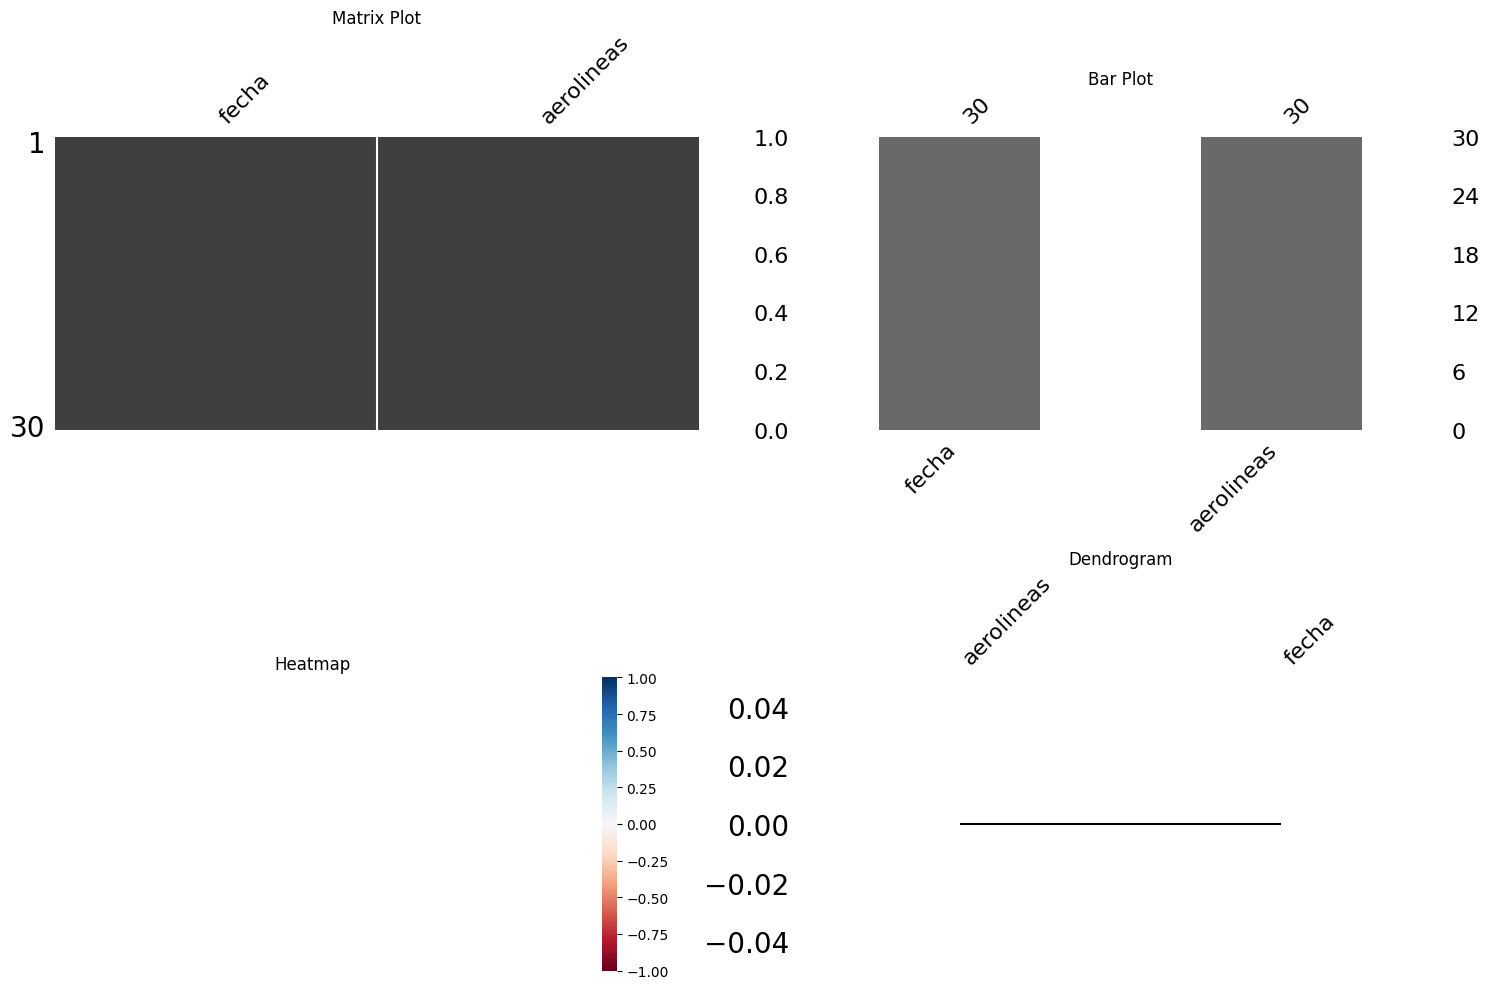

In [21]:
visualizar_nulos(AEROLINEASPORTRIMESTRE)

- VISUALIZACIÓN DE VALORES ATÍPICOS, EXTREMOS Y OUTLIERS.

_Columnas Cualitativas._

c:\Users\LENOVO\Downloads\CONECTIVIDAD AÉREA\funciones.py:151: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([word for word, _ in palabras_mas_frecuentes], rotation=45)


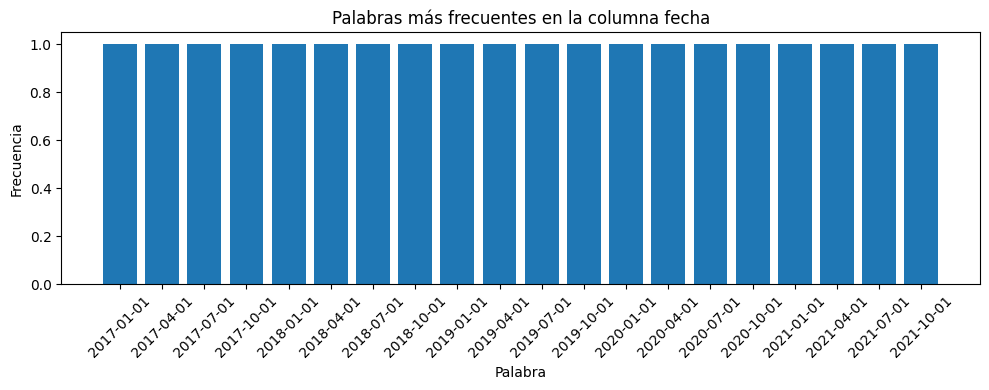

In [22]:
analisis_frecuencia_palabras(AEROLINEASPORTRIMESTRE)

_Columnas Cuantitativas._

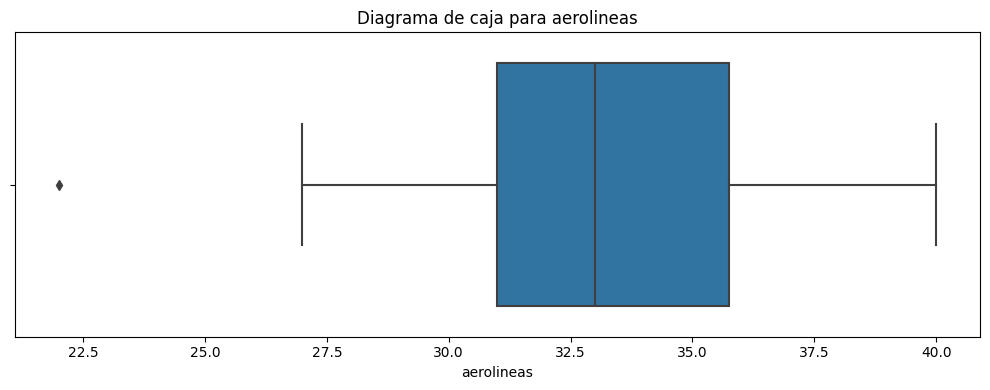

In [23]:
boxplots_numericas(AEROLINEASPORTRIMESTRE)

- VISUALIZACIÓN DE VALORES DUPLICADOS.

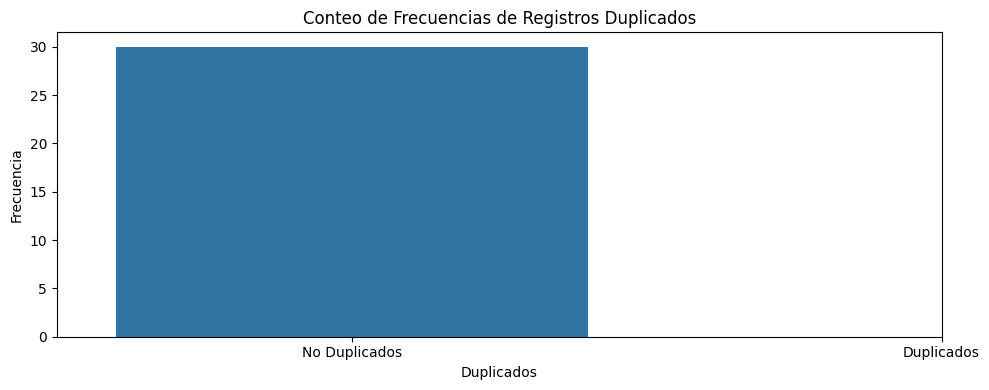

In [24]:
hist_duplicados(AEROLINEASPORTRIMESTRE)

# <h1 align=center> AEROPUERTOS </h1>

- INFORME DATAFRAME.

In [33]:
informe_dataframe(AEROPUERTOS)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 48
Columnas: 9

--Numero de datos--
432

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 47
Columnas: ['aeropuerto', 'aeropuerto_etiqueta_anac', 'localidad_etiqueta_indec', 'provincia_etiqueta_indec', 'pais_etiqueta_indec', 'continente_etiqueta_indec', 'continente_etiqueta_migraciones', 'latitud', 'longitud']

--Tipo de columnas--
aeropuerto                          object
aeropuerto_etiqueta_anac            object
localidad_etiqueta_indec            object
provincia_etiqueta_indec            object
pais_etiqueta_indec                 object
continente_etiqueta_indec           object
continente_etiqueta_migraciones     object
latitud                            float64
longitud                           float64
dtype: object

--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

- VERIFICAR TIPO DE DATOS.

In [34]:
verificar_tipo_datos(AEROPUERTOS)

nombre_campo         tipo_datos  no_nulos_%  nulos_%  \
0                       aeropuerto    [<class 'str'>]       100.0      0.0   
1         aeropuerto_etiqueta_anac    [<class 'str'>]       100.0      0.0   
2         localidad_etiqueta_indec    [<class 'str'>]       100.0      0.0   
3         provincia_etiqueta_indec    [<class 'str'>]       100.0      0.0   
4              pais_etiqueta_indec    [<class 'str'>]       100.0      0.0   
5        continente_etiqueta_indec    [<class 'str'>]       100.0      0.0   
6  continente_etiqueta_migraciones    [<class 'str'>]       100.0      0.0   
7                          latitud  [<class 'float'>]       100.0      0.0   
8                         longitud  [<class 'float'>]       100.0      0.0   

   nulos  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      0  
8      0

- INFORME DE COLUMNAS.

In [35]:
for columna in AEROPUERTOS.columns:
    informe_columna(AEROPUERTOS,columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE aeropuerto:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
48

--Valores unicos en la columna (Primeros 5 valores)--
['SACO' 'SAZS' 'SAAV' 'SANT' 'SABE']

--Moda de la columna especificada--
Valor modal -----> SACO
Frecuencia acumulada ------> 1

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 aeropuerto
SACO    1
SAZS    1
SAMR    1
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE aeropuerto_etiqueta_anac:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
48

--Valores unicos en la columna (Primeros 5 valores)--
['Aeropuerto Int. Ingeniero Ambrosio Taravella'
 'Aeropuerto Int. Tte. Luis Candel

- VISUALIZACIÓN DE NULOS.

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shap

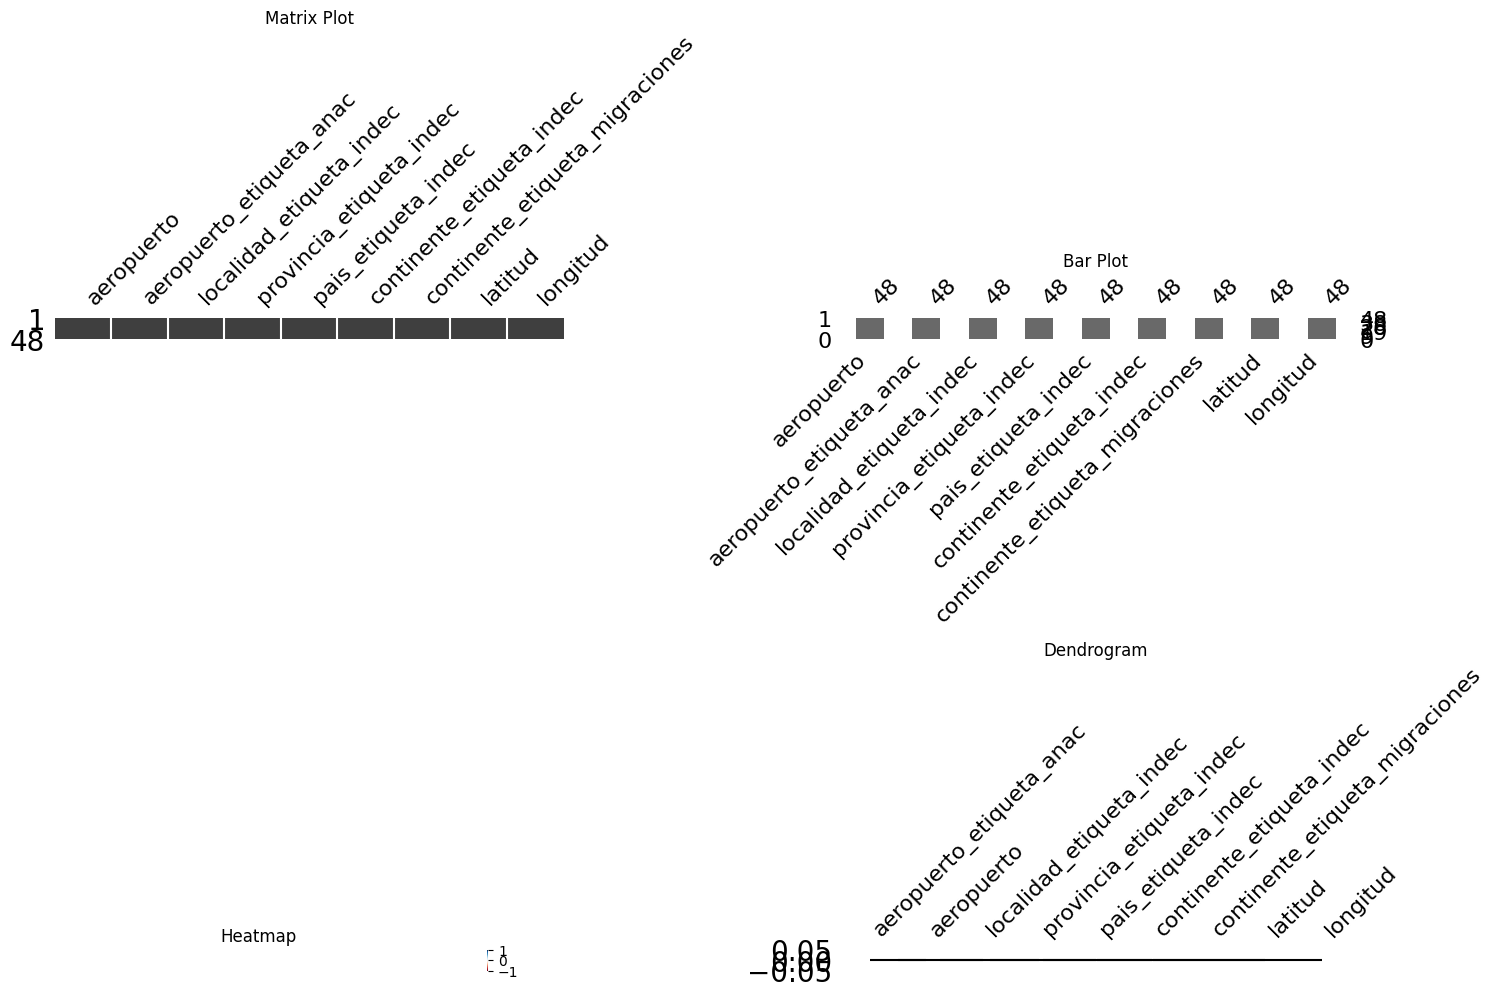

In [36]:
visualizar_nulos(AEROPUERTOS)

- VISUALIZACIÓN DE VALORES ATÍPICOS, EXTREMOS Y OUTLIERS.

_Columnas Cualitativas._

c:\Users\LENOVO\Downloads\CONECTIVIDAD AÉREA\funciones.py:151: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([word for word, _ in palabras_mas_frecuentes], rotation=45)


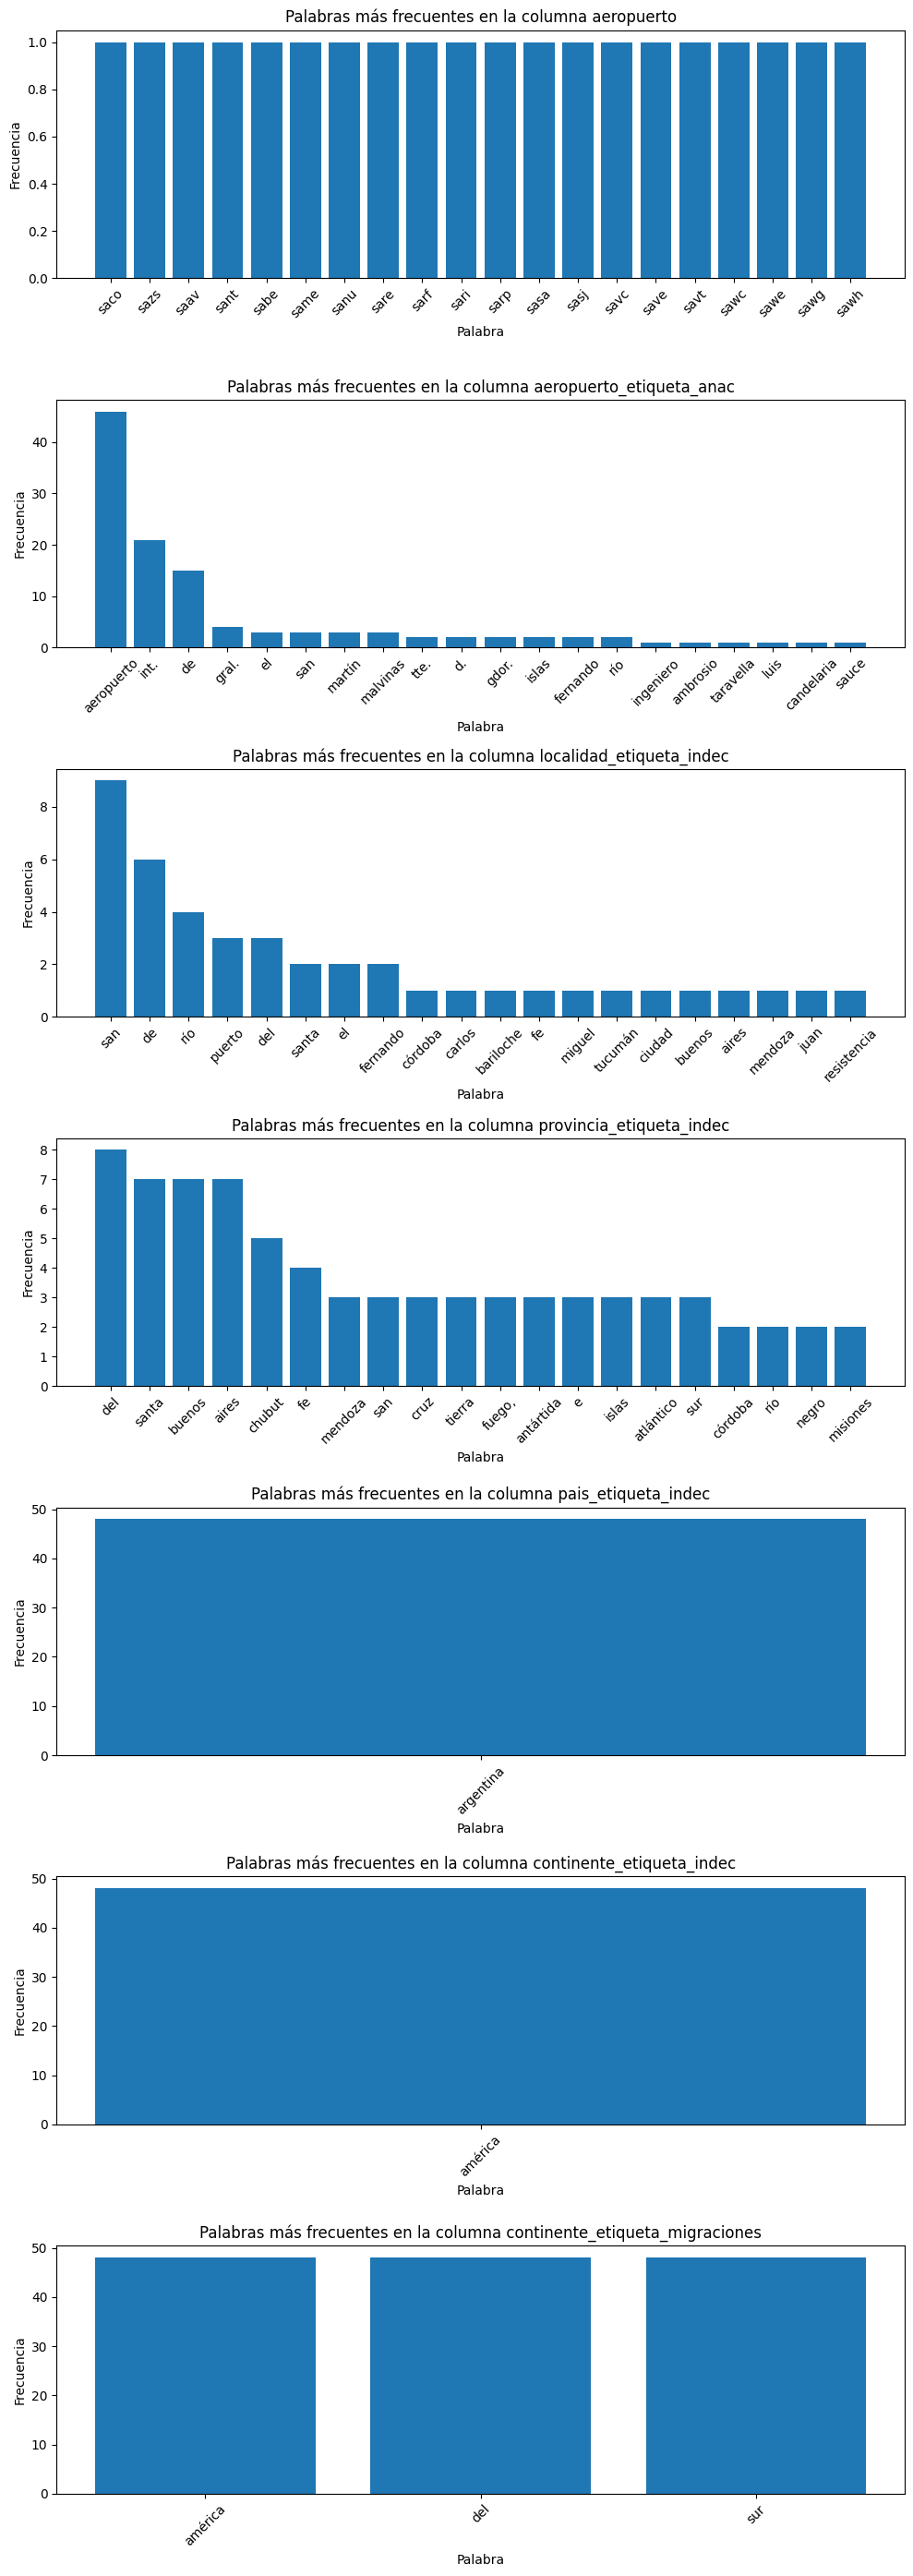

In [37]:
analisis_frecuencia_palabras(AEROPUERTOS)

_Columnas Cuantitativas._

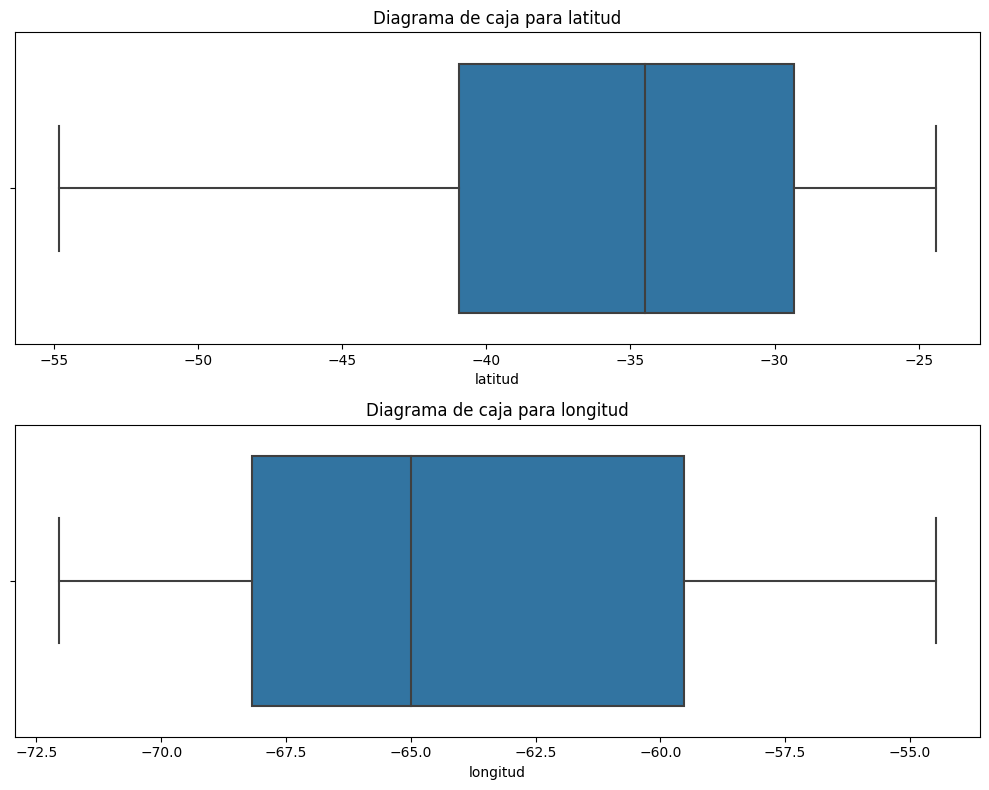

In [38]:
boxplots_numericas(AEROPUERTOS)

- VISUALIZACIÓN DE VALORES DUPLICADOS.

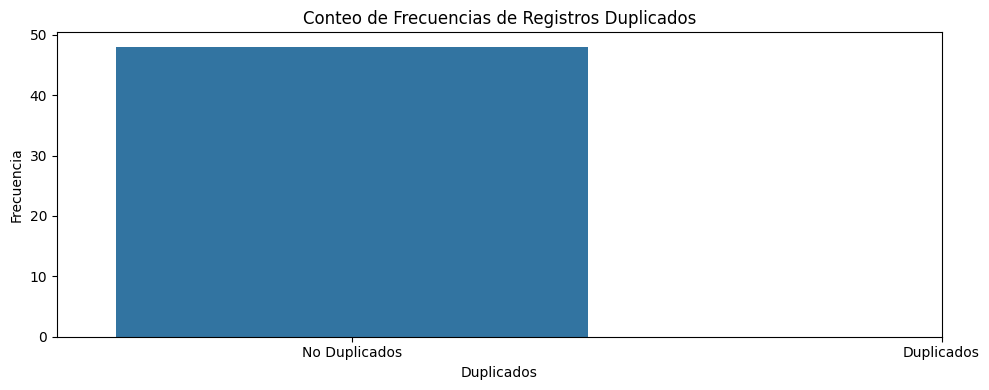

In [39]:
hist_duplicados(AEROPUERTOS)

# <h1 align=center> DATABASEGENERAL </h1>

- INFORME DATAFRAME.

In [40]:
informe_dataframe(DATABASEGENERAL)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 781648
Columnas: 19

--Numero de datos--
14523908

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 781647
Columnas: ['fecha', 'clasificacion_vuelo', 'clase_vuelo', 'aerolinea', 'origen_oaci', 'origen_aeropuerto', 'origen_localidad', 'origen_provincia', 'origen_pais', 'origen_continente', 'destino_oaci', 'destino_aeropuerto', 'destino_localidad', 'destino_provincia', 'destino_pais', 'destino_continente', 'pasajeros', 'asientos', 'vuelos']

--Tipo de columnas--
fecha                  object
clasificacion_vuelo    object
clase_vuelo            object
aerolinea              object
origen_oaci            object
origen_aeropuerto      object
origen_localidad       object
origen_provincia       object
origen_pais            object
origen_continente      object
destino_oaci           object
destino_aeropuerto     object
destino_localidad      object
destino_

'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

- VERIFICAR TIPO DE DATOS.

In [41]:
verificar_tipo_datos(DATABASEGENERAL)

nombre_campo                        tipo_datos  no_nulos_%  \
0                 fecha                   [<class 'str'>]      100.00   
1   clasificacion_vuelo                   [<class 'str'>]      100.00   
2           clase_vuelo                   [<class 'str'>]      100.00   
3             aerolinea                   [<class 'str'>]      100.00   
4           origen_oaci                   [<class 'str'>]      100.00   
5     origen_aeropuerto                   [<class 'str'>]      100.00   
6      origen_localidad                   [<class 'str'>]      100.00   
7      origen_provincia  [<class 'str'>, <class 'float'>]       79.13   
8           origen_pais                   [<class 'str'>]      100.00   
9     origen_continente  [<class 'str'>, <class 'float'>]      100.00   
10         destino_oaci                   [<class 'str'>]      100.00   
11   destino_aeropuerto                   [<class 'str'>]      100.00   
12    destino_localidad                   [<class 'str'>]      100.00   
13    destino_provincia  [<class 'str'>, <class 'float'>]       78.99   
14         destino_pais                   [<class 'str'>]      100.00   
15   destino_continente                   [<class 'str'>]      100.00   
16            pasajeros                   [<class 'int'>]      100.00   
17             asientos                   [<class 'int'>]      100.00   
18               vuelos                   [<class 'int'>]      100.00   

    nulos_%   nulos  
0      0.00       0  
1      0.00       0  
2      0.00       0  
3      0.00       0  
4      0.00       0  
5      0.00       0  
6      0.00       0  
7     20.87  163166  
8      0.00       0  
9      0.00       1  
10     0.00       0  
11     0.00       0  
12     0.00       0  
13    21.01  164237  
14     0.00       0  
15     0.00       0  
16     0.00       0  
17     0.00       0  
18     0.00       0

- INFORME DE COLUMNAS.

In [42]:
for columna in DATABASEGENERAL.columns:
    informe_columna(DATABASEGENERAL,columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE fecha:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
2667

--Valores unicos en la columna (Primeros 5 valores)--
['2017-01-01' '2017-01-02' '2017-01-03' '2017-01-04' '2017-01-05']

--Moda de la columna especificada--
Valor modal -----> 2019-01-07
Frecuencia acumulada ------> 516

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 fecha
2019-01-07    516
2019-01-14    509
2019-01-21    506
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE clasificacion_vuelo:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
2

--Valores unicos en la columna--
['Cabotaje' 'Internacional']

--Moda de la columna espe

- VISUALIZACIÓN DE NULOS.

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


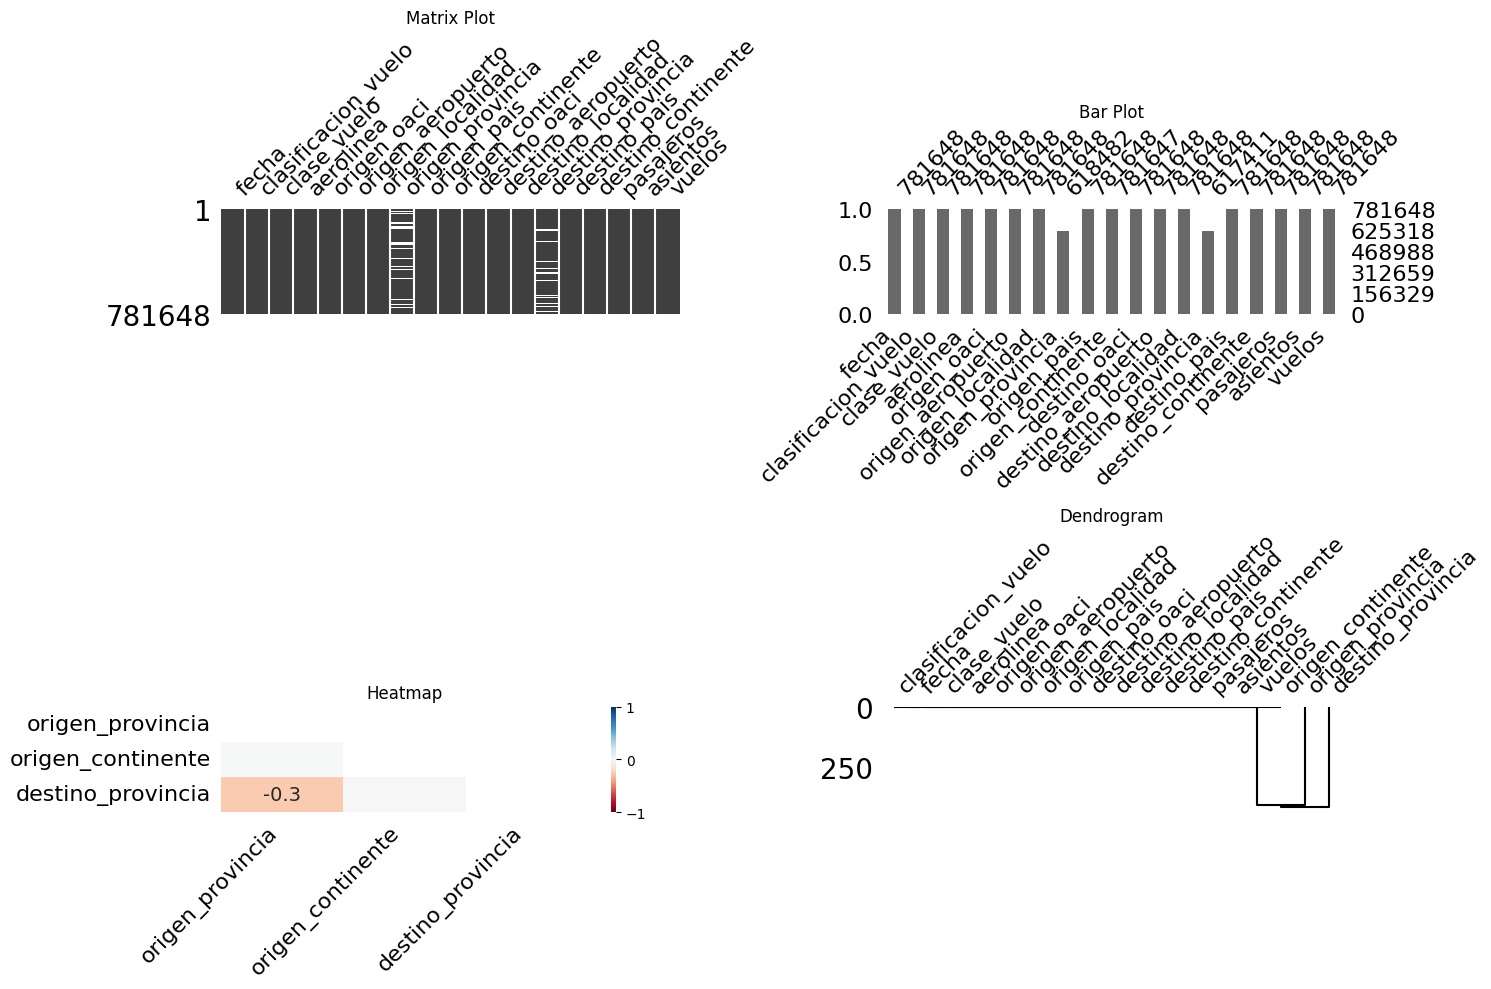

In [43]:
visualizar_nulos(DATABASEGENERAL)

- VISUALIZACIÓN DE FILAS CON VALORES NULOS.

In [44]:
mostrar_filas_con_nulos(DATABASEGENERAL)

fecha clasificacion_vuelo clase_vuelo               aerolinea  \
181262  2018-05-02       Internacional     Regular                 Avianca   
379478  2019-08-29       Internacional     Regular               Amaszonas   
606173  2022-12-08       Internacional  No Regular       JetSMART Airlines   
349299  2019-06-14       Internacional     Regular               Amaszonas   
743087  2024-01-09       Internacional     Regular  Gol Transportes Aéreos   

       origen_oaci                                  origen_aeropuerto  \
181262        SAEZ                 Aeropuerto Int. Ministro Pistarini   
379478        SUMU  Carrasco International /General C L Berisso Ai...   
606173        SCEL  Comodoro Arturo Merino Benítez International A...   
349299        SUMU  Carrasco International /General C L Berisso Ai...   
743087        SAEZ                 Aeropuerto Int. Ministro Pistarini   

       origen_localidad origen_provincia origen_pais origen_continente  \
181262           Ezeiza     Buenos Aires   Argentina   América del Sur   
379478       Montevideo              NaN     Uruguay   América del Sur   
606173         Santiago              NaN       Chile   América del Sur   
349299       Montevideo              NaN     Uruguay   América del Sur   
743087           Ezeiza     Buenos Aires   Argentina   América del Sur   

       destino_oaci                  destino_aeropuerto  \
181262         SKBO     El Dorado International Airport   
379478         SABE            Aeroparque Jorge Newbery   
606173         SAEZ  Aeropuerto Int. Ministro Pistarini   
349299         SABE            Aeroparque Jorge Newbery   
743087         SBFL  Hercílio Luz International Airport   

             destino_localidad                destino_provincia destino_pais  \
181262                  Bogotá                              NaN     Colombia   
379478  Ciudad de Buenos Aires  Ciudad Autónoma de Buenos Aires    Argentina   
606173                  Ezeiza                     Buenos Aires    Argentina   
349299  Ciudad de Buenos Aires  Ciudad Autónoma de Buenos Aires    Argentina   
743087           Florianópolis                              NaN       Brasil   

       destino_continente  pasajeros  asientos  vuelos  
181262    América del Sur        250       250       1  
379478    América del Sur         26        50       1  
606173    América del Sur        155       240       1  
349299    América del Sur         25       100       2  
743087    América del Sur        155       186       1

- VISUALIZACIÓN DE VALORES ATÍPICOS, EXTREMOS Y OUTLIERS.

_Columnas Cualitativas._

c:\Users\LENOVO\Downloads\CONECTIVIDAD AÉREA\funciones.py:151: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([word for word, _ in palabras_mas_frecuentes], rotation=45)


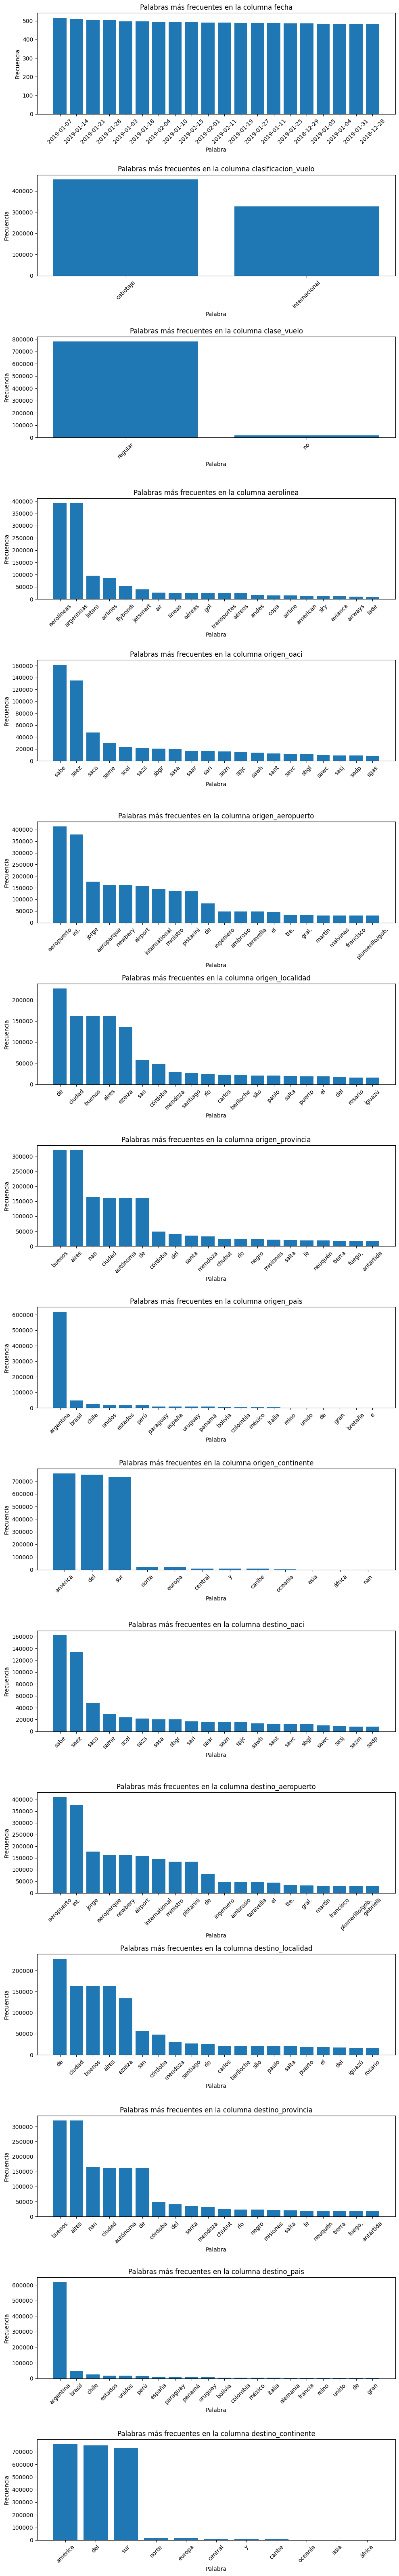

In [45]:
analisis_frecuencia_palabras(DATABASEGENERAL)

_Columnas Cuantitativas._

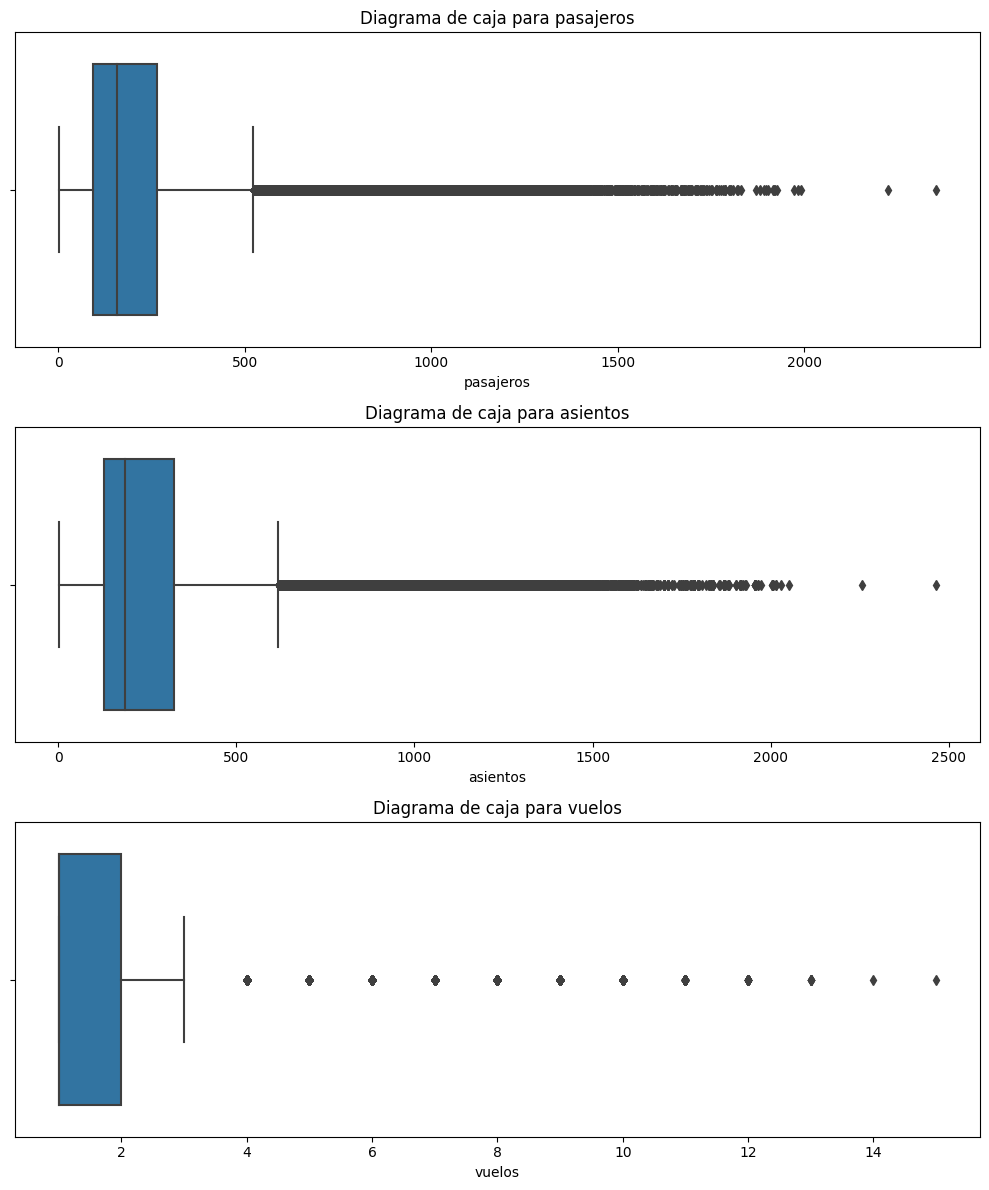

In [46]:
boxplots_numericas(DATABASEGENERAL)

- VISUALIZACIÓN DE VALORES DUPLICADOS.

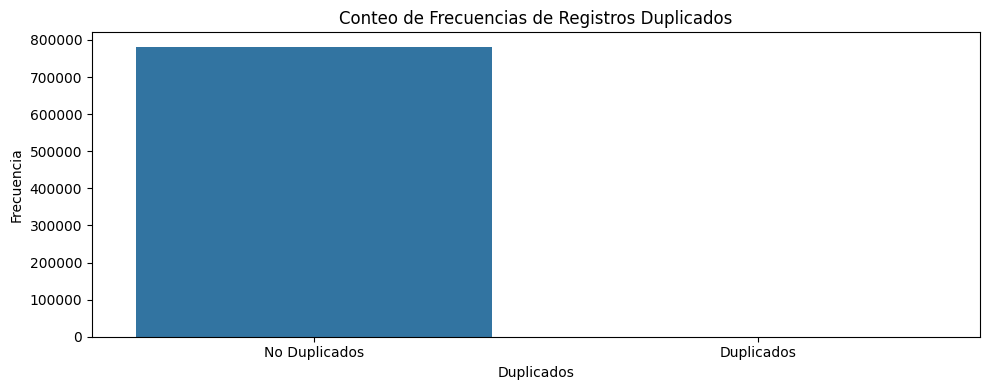

In [47]:
hist_duplicados(DATABASEGENERAL)

- VISUALIZACIÓN DE FILAS CON VALORES DUPLICADOS.

In [48]:
mostrar_filas_duplicadas(DATABASEGENERAL)

fecha clasificacion_vuelo clase_vuelo              aerolinea  \
8833    2017-01-25            Cabotaje     Regular  Aerolíneas Argentinas   
8871    2017-01-25            Cabotaje     Regular  Aerolíneas Argentinas   
8927    2017-01-25            Cabotaje     Regular  Aerolíneas Argentinas   
8979    2017-01-25            Cabotaje     Regular  Aerolíneas Argentinas   
48403   2017-05-20       Internacional     Regular                  LATAM   
...            ...                 ...         ...                    ...   
687288  2023-08-04       Internacional     Regular                  LATAM   
713085  2023-10-17       Internacional     Regular                  LATAM   
713087  2023-10-17       Internacional     Regular                  LATAM   
767423  2024-03-18       Internacional     Regular                  LATAM   
767427  2024-03-18       Internacional     Regular                  LATAM   

       origen_oaci                   origen_aeropuerto  \
8833          SABE            Aeroparque Jorge Newbery   
8871          SAWE                          Río Grande   
8927          SABE            Aeroparque Jorge Newbery   
8979          SAWE                          Río Grande   
48403         SAEZ  Aeropuerto Int. Ministro Pistarini   
...            ...                                 ...   
687288        SAEZ  Aeropuerto Int. Ministro Pistarini   
713085        SPJC  Jorge Chávez International Airport   
713087        SPJC  Jorge Chávez International Airport   
767423        SAEZ  Aeropuerto Int. Ministro Pistarini   
767427        SAEZ  Aeropuerto Int. Ministro Pistarini   

              origen_localidad  \
8833    Ciudad de Buenos Aires   
8871                Río Grande   
8927    Ciudad de Buenos Aires   
8979                Río Grande   
48403                   Ezeiza   
...                        ...   
687288                  Ezeiza   
713085                    Lima   
713087                    Lima   
767423                  Ezeiza   
767427                  Ezeiza   

                                         origen_provincia origen_pais  \
8833                      Ciudad Autónoma de Buenos Aires   Argentina   
8871    Tierra del Fuego, Antártida e Islas del Atlánt...   Argentina   
8927                      Ciudad Autónoma de Buenos Aires   Argentina   
8979    Tierra del Fuego, Antártida e Islas del Atlánt...   Argentina   
48403                                        Buenos Aires   Argentina   
...                                                   ...         ...   
687288                                       Buenos Aires   Argentina   
713085                                                nan        Perú   
713087                                                nan        Perú   
767423                                       Buenos Aires   Argentina   
767427                                       Buenos Aires   Argentina   

       origen_continente destino_oaci                  destino_aeropuerto  \
8833     América del Sur         SAWE                          Río Grande   
8871     América del Sur         SAEZ  Aeropuerto Int. Ministro Pistarini   
8927     América del Sur         SAWE                          Río Grande   
8979     América del Sur         SAEZ  Aeropuerto Int. Ministro Pistarini   
48403    América del Sur         SPJC  Jorge Chávez International Airport   
...                  ...          ...                                 ...   
687288   América del Sur         SPJC  Jorge Chávez International Airport   
713085   América del Sur         SAEZ  Aeropuerto Int. Ministro Pistarini   
713087   América del Sur         SAEZ  Aeropuerto Int. Ministro Pistarini   
767423   América del Sur         SPJC  Jorge Chávez International Airport   
767427   América del Sur         SPJC  Jorge Chávez International Airport   

       destino_localidad                                  destino_provincia  \
8833          Río Grande  Tierra del Fuego, Antártida e Islas del Atlánt...   
8871              Ezei

# <h1 align=center> MAGNITUDPORRUTA </h1>

- INFORME DATAFRAME.

In [49]:
informe_dataframe(MAGNITUDPORRUTA)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 1384
Columnas: 6

--Numero de datos--
8304

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 1383
Columnas: ['fecha', 'clasificacion_vuelo', 'ruta_nombre', 'vuelos', 'pasajeros', 'asientos']

--Tipo de columnas--
fecha                  object
clasificacion_vuelo    object
ruta_nombre            object
vuelos                  int64
pasajeros               int64
asientos                int64
dtype: object

--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

- VERIFICAR TIPO DE DATOS.

In [50]:
verificar_tipo_datos(MAGNITUDPORRUTA)

nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0                fecha  [<class 'str'>]       100.0      0.0      0
1  clasificacion_vuelo  [<class 'str'>]       100.0      0.0      0
2          ruta_nombre  [<class 'str'>]       100.0      0.0      0
3               vuelos  [<class 'int'>]       100.0      0.0      0
4            pasajeros  [<class 'int'>]       100.0      0.0      0
5             asientos  [<class 'int'>]       100.0      0.0      0

- INFORME DE COLUMNAS.

In [51]:
for columna in MAGNITUDPORRUTA.columns:
    informe_columna(MAGNITUDPORRUTA,columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE fecha:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
8

--Valores unicos en la columna (Primeros 5 valores)--
['2017-01-01' '2018-01-01' '2019-01-01' '2020-01-01' '2021-01-01']

--Moda de la columna especificada--
Valor modal -----> 2018-01-01
Frecuencia acumulada ------> 200

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 fecha
2018-01-01    200
2019-01-01    199
2023-01-01    181
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE clasificacion_vuelo:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
2

--Valores unicos en la columna--
['Cabotaje' 'Internacional']

--Moda de la columna especif

- VISUALIZACIÓN DE NULOS.

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shap

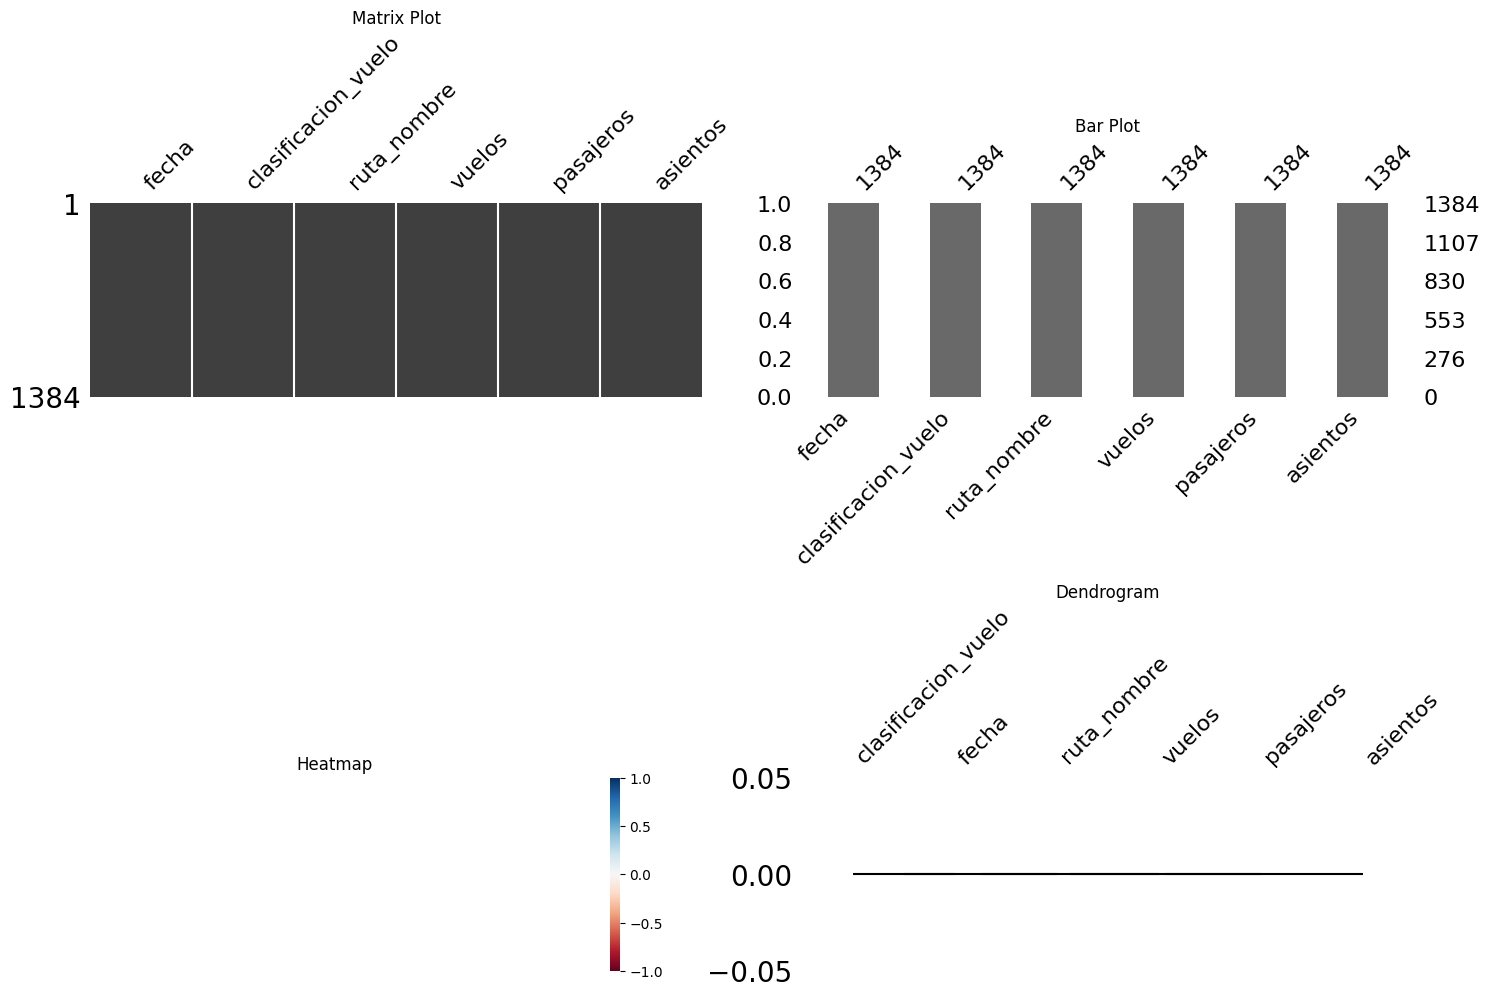

In [52]:
visualizar_nulos(MAGNITUDPORRUTA)

- VISUALIZACIÓN DE VALORES ATÍPICOS, EXTREMOS Y OUTLIERS.

_Columnas Cualitativas._

c:\Users\LENOVO\Downloads\CONECTIVIDAD AÉREA\funciones.py:151: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([word for word, _ in palabras_mas_frecuentes], rotation=45)


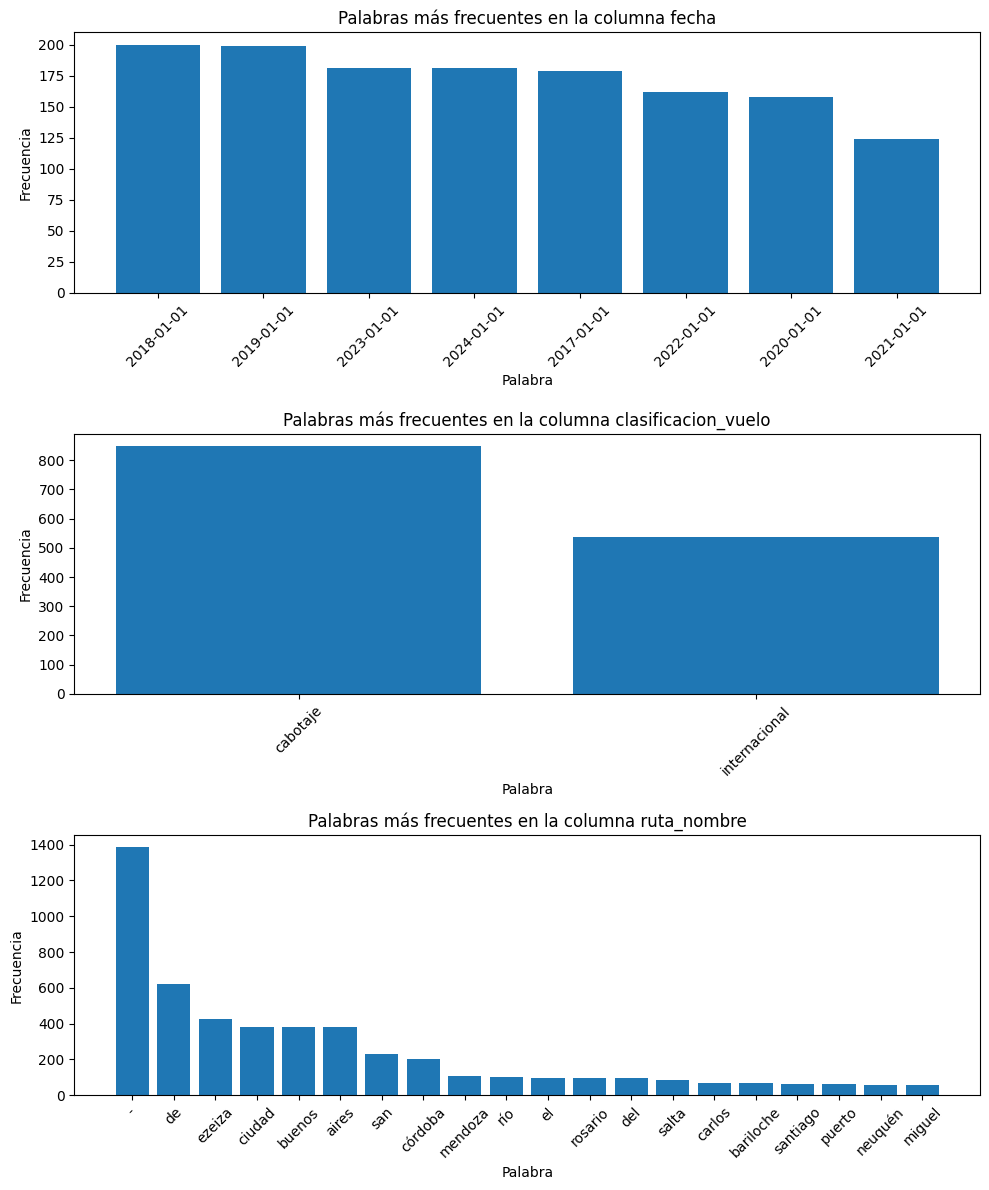

In [53]:
analisis_frecuencia_palabras(MAGNITUDPORRUTA)

_Columnas Cuantitativas._

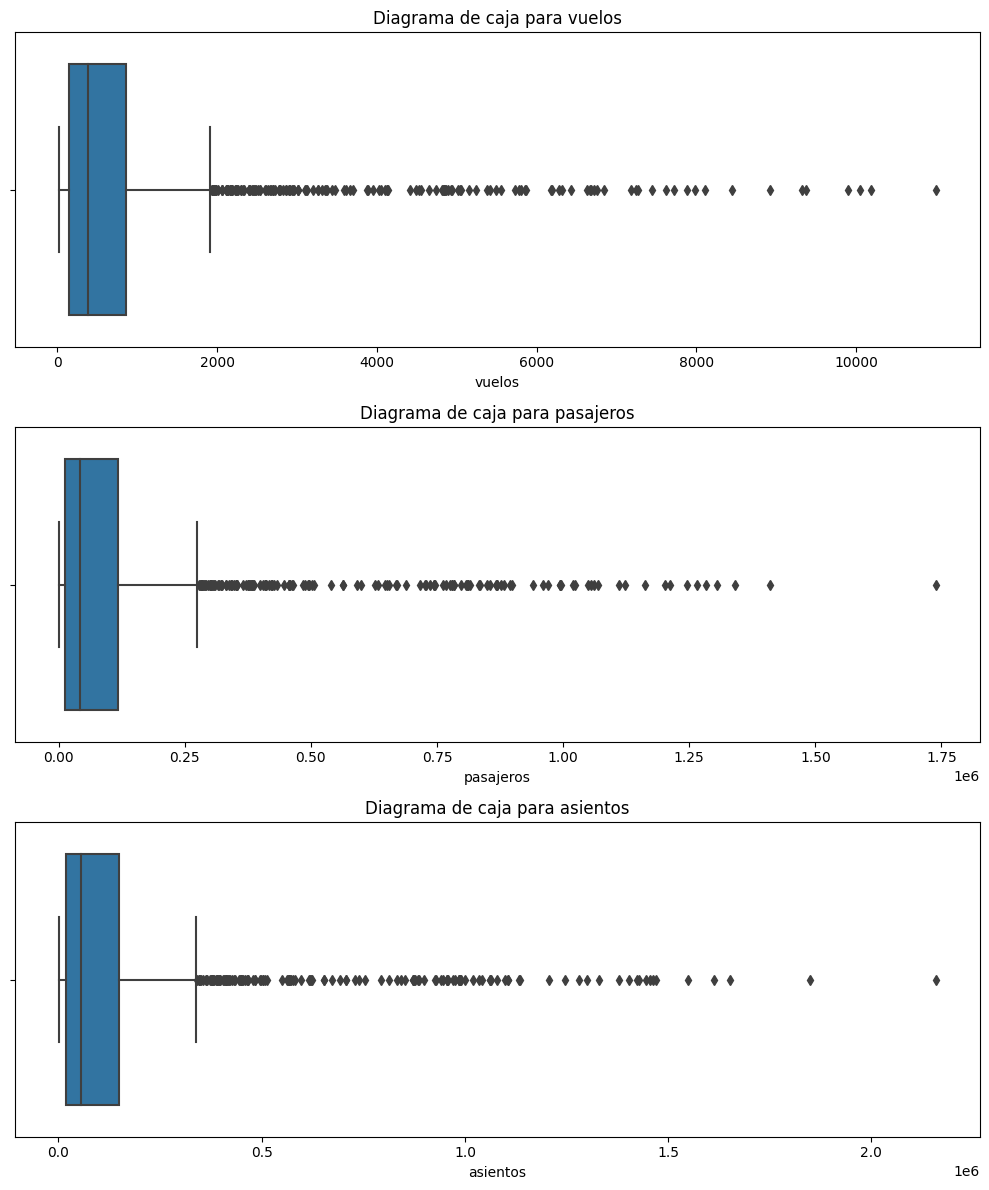

In [54]:
boxplots_numericas(MAGNITUDPORRUTA)

- VISUALIZACIÓN DE VALORES DUPLICADOS.

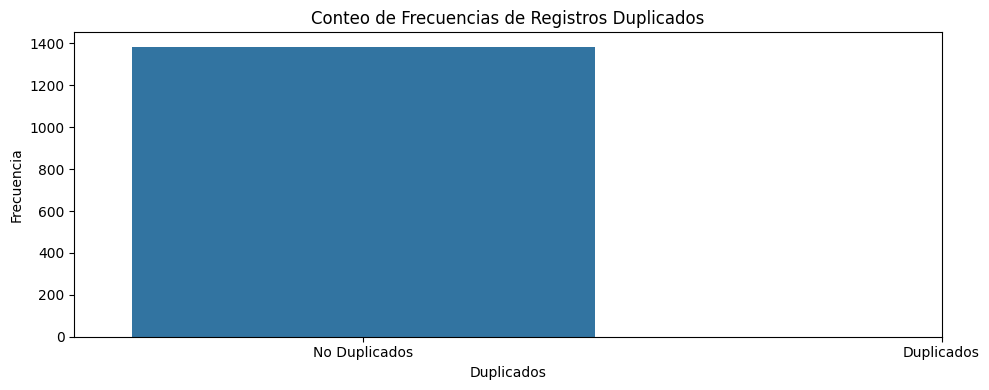

In [55]:
hist_duplicados(MAGNITUDPORRUTA)

# <h1 align=center> PRINCIPALESAEREOSCABOTAJE </h1>

- INFORME DATAFRAME.

In [56]:
informe_dataframe(PRINCIPALESAEREOSCABOTAJE)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 302
Columnas: 6

--Numero de datos--
1812

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 301
Columnas: ['fecha', 'aerolinea', 'vuelos', 'pasajeros', 'asientos', 'ocupacion']

--Tipo de columnas--
fecha        object
aerolinea    object
vuelos        int64
pasajeros     int64
asientos      int64
ocupacion     int64
dtype: object

--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

- VERIFICAR TIPO DE DATOS.

In [57]:
verificar_tipo_datos(PRINCIPALESAEREOSCABOTAJE)

nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0        fecha  [<class 'str'>]       100.0      0.0      0
1    aerolinea  [<class 'str'>]       100.0      0.0      0
2       vuelos  [<class 'int'>]       100.0      0.0      0
3    pasajeros  [<class 'int'>]       100.0      0.0      0
4     asientos  [<class 'int'>]       100.0      0.0      0
5    ocupacion  [<class 'int'>]       100.0      0.0      0

- INFORME DE COLUMNAS.

In [58]:
for columna in PRINCIPALESAEREOSCABOTAJE.columns:
    informe_columna(PRINCIPALESAEREOSCABOTAJE,columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE fecha:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
88

--Valores unicos en la columna (Primeros 5 valores)--
['2017-01-01' '2017-02-01' '2017-03-01' '2017-04-01' '2017-05-01']

--Moda de la columna especificada--
Valor modal -----> 2024-04-01
Frecuencia acumulada ------> 4

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 fecha
2024-04-01    4
2022-01-01    4
2019-06-01    4
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE aerolinea:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
4

--Valores unicos en la columna--
['Aerolíneas Argentinas' 'LADE - Líneas Aéreas Del Estado' 'Flybondi'
 'Jet

- VISUALIZACIÓN DE NULOS.

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shap

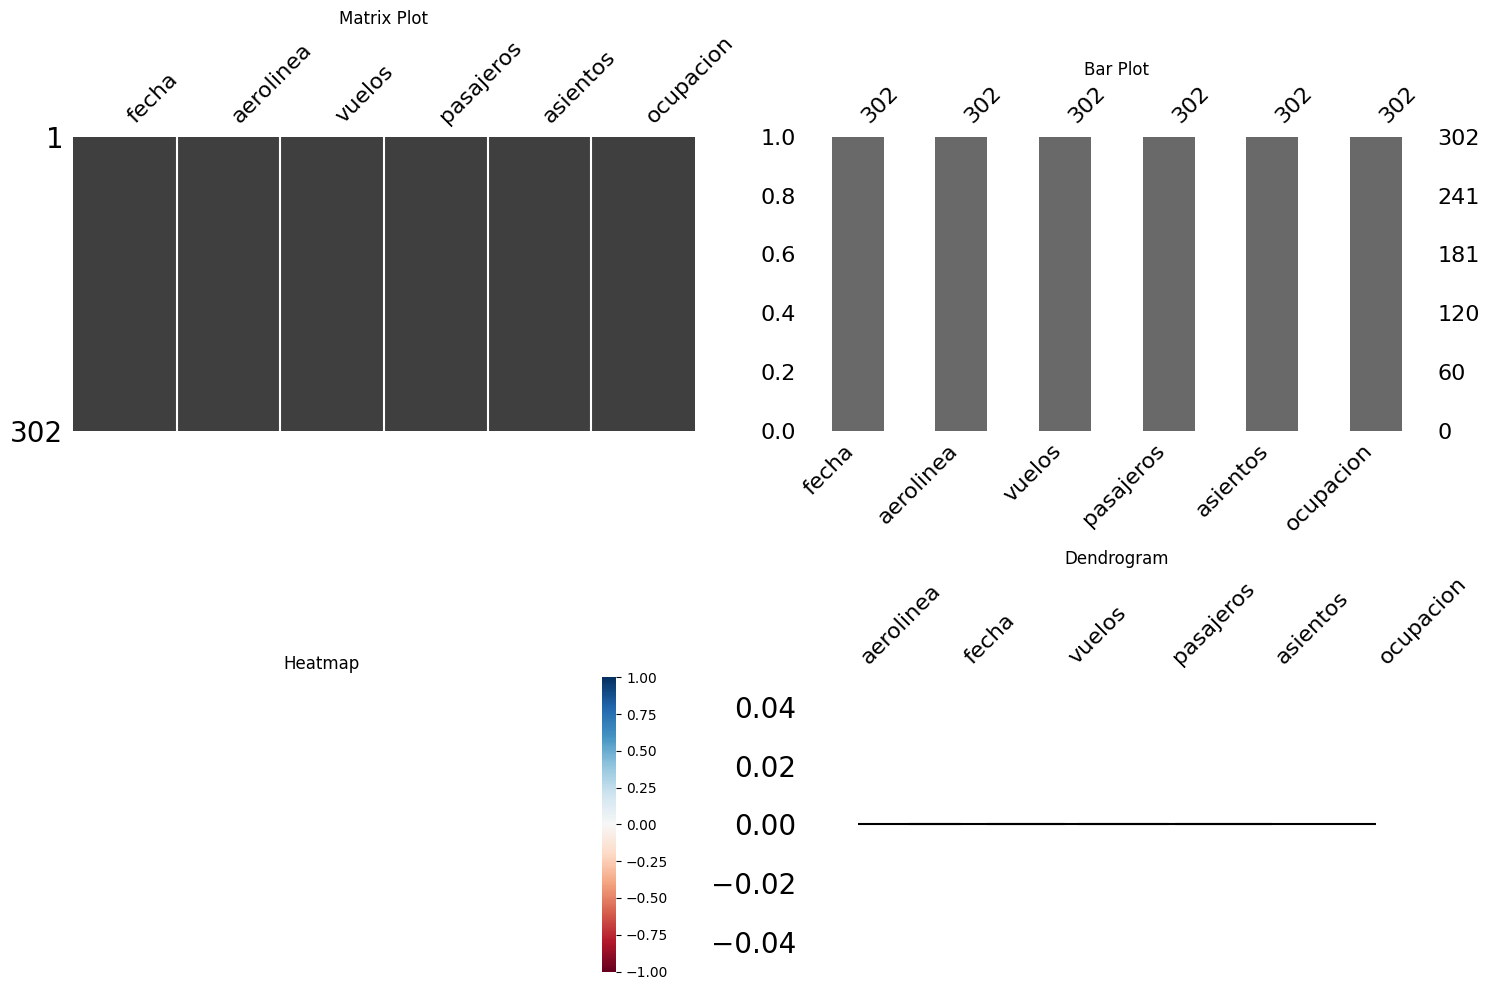

In [59]:
visualizar_nulos(PRINCIPALESAEREOSCABOTAJE)

- VISUALIZACIÓN DE VALORES ATÍPICOS, EXTREMOS Y OUTLIERS.

_Columnas Cualitativas._

c:\Users\LENOVO\Downloads\CONECTIVIDAD AÉREA\funciones.py:151: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([word for word, _ in palabras_mas_frecuentes], rotation=45)


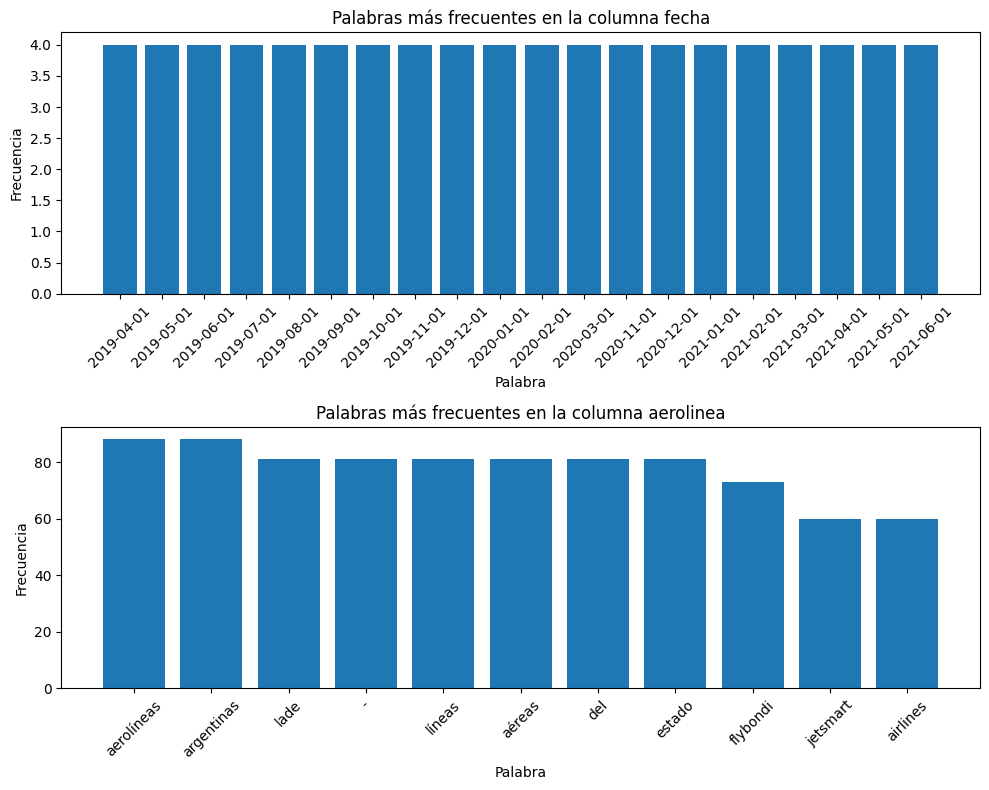

In [60]:
analisis_frecuencia_palabras(PRINCIPALESAEREOSCABOTAJE)

_Columnas Cuantitativas._

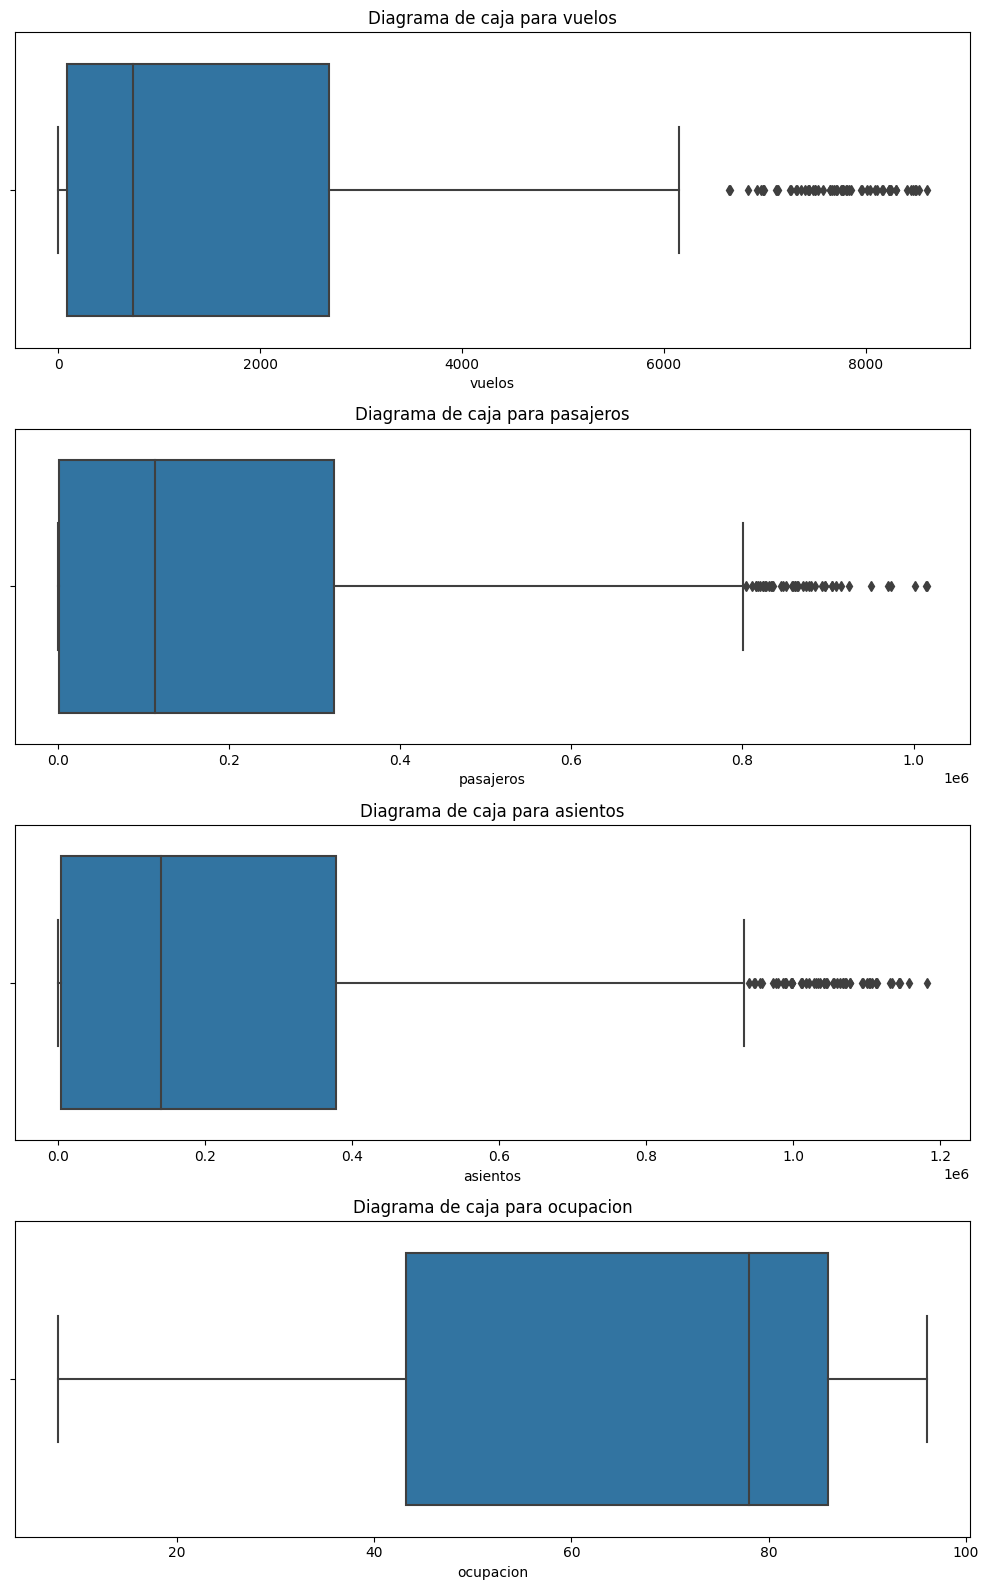

In [61]:
boxplots_numericas(PRINCIPALESAEREOSCABOTAJE)

- VISUALIZACIÓN DE VALORES DUPLICADOS.

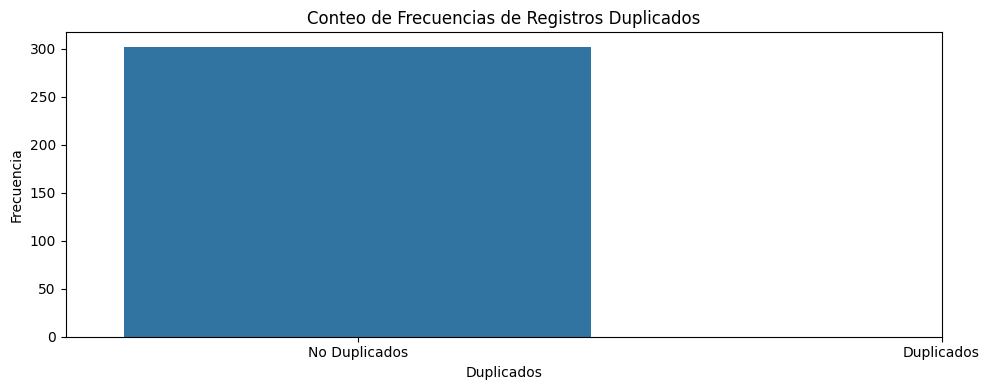

In [62]:
hist_duplicados(PRINCIPALESAEREOSCABOTAJE)

# <h1 align=center> RUTAPORMES </h1>

- INFORME DATAFRAME.

In [63]:
informe_dataframe(RUTAPORMES)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 176
Columnas: 3

--Numero de datos--
528

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 175
Columnas: ['fecha', 'clasificacion_vuelo', 'total_rutas']

--Tipo de columnas--
fecha                  object
clasificacion_vuelo    object
total_rutas             int64
dtype: object

--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

- INFORME DATAFRAME.

In [64]:
informe_dataframe(RUTAPORMES)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 176
Columnas: 3

--Numero de datos--
528

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 175
Columnas: ['fecha', 'clasificacion_vuelo', 'total_rutas']

--Tipo de columnas--
fecha                  object
clasificacion_vuelo    object
total_rutas             int64
dtype: object

--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

- VERIFICAR TIPO DE DATOS.

In [65]:
verificar_tipo_datos(RUTAPORMES)

nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0                fecha  [<class 'str'>]       100.0      0.0      0
1  clasificacion_vuelo  [<class 'str'>]       100.0      0.0      0
2          total_rutas  [<class 'int'>]       100.0      0.0      0

- INFORME DE COLUMNAS.

In [66]:
for columna in RUTAPORMES.columns:
    informe_columna(RUTAPORMES,columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE fecha:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
88

--Valores unicos en la columna (Primeros 5 valores)--
['2017-01-01' '2017-02-01' '2017-03-01' '2017-04-01' '2017-05-01']

--Moda de la columna especificada--
Valor modal -----> 2017-01-01
Frecuencia acumulada ------> 2

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 fecha
2017-01-01    2
2017-02-01    2
2022-05-01    2
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE clasificacion_vuelo:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
2

--Valores unicos en la columna--
['Cabotaje' 'Internacional']

--Moda de la columna especificada--

- VISUALIZACIÓN DE NULOS.

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shap

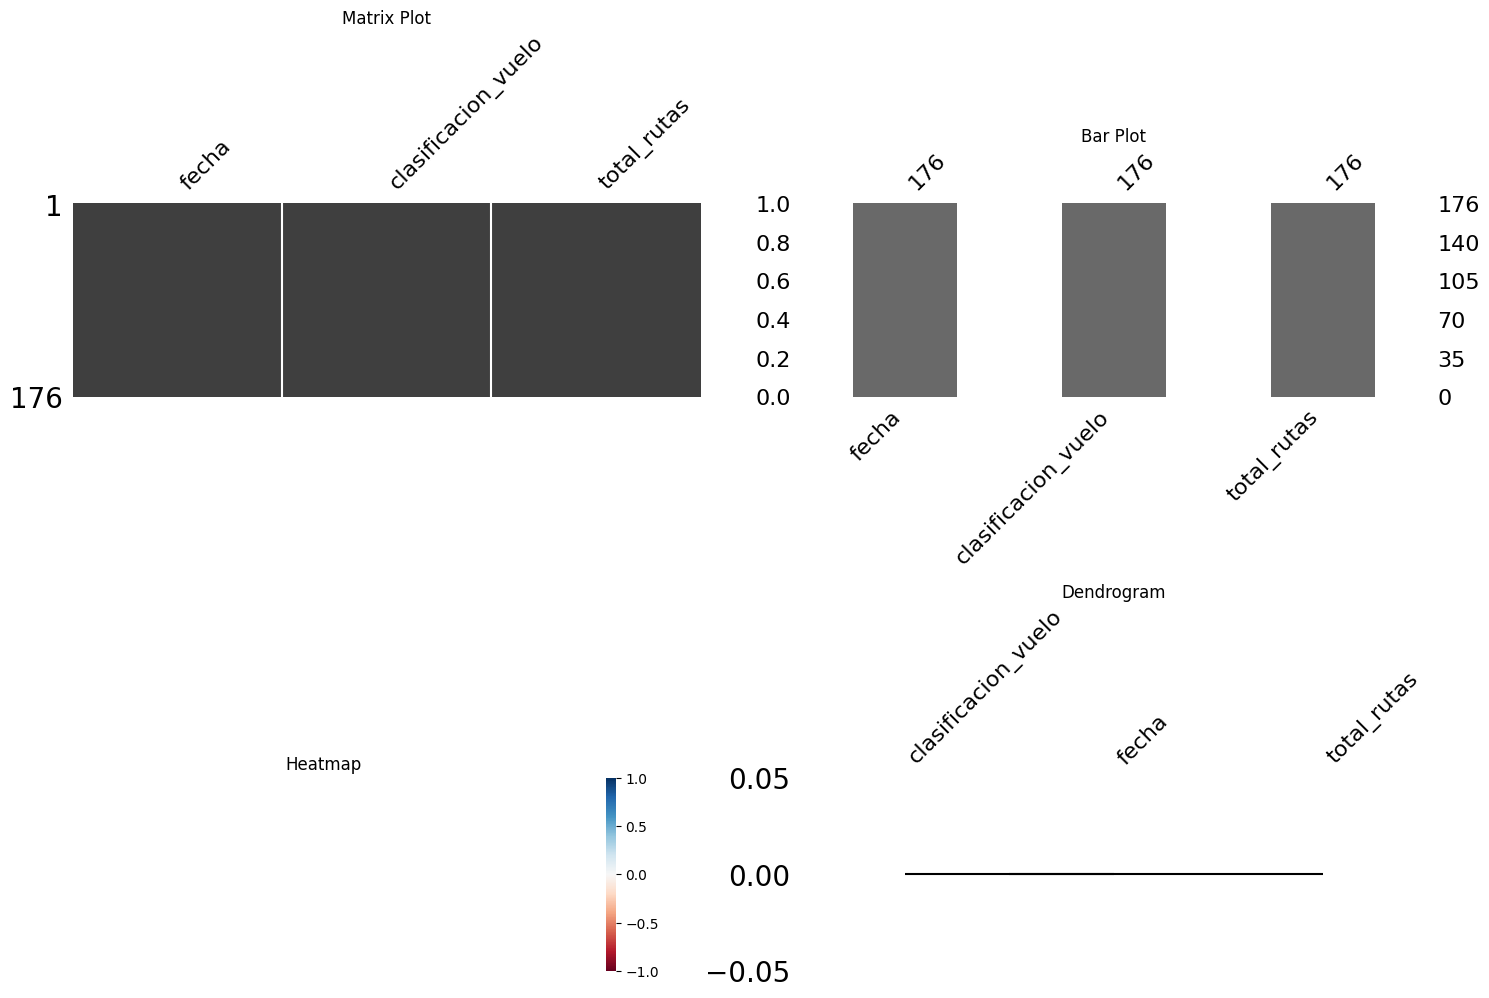

In [67]:
visualizar_nulos(RUTAPORMES)

- VISUALIZACIÓN DE VALORES ATÍPICOS, EXTREMOS Y OUTLIERS.

_Columnas Cualitativas._

c:\Users\LENOVO\Downloads\CONECTIVIDAD AÉREA\funciones.py:151: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([word for word, _ in palabras_mas_frecuentes], rotation=45)


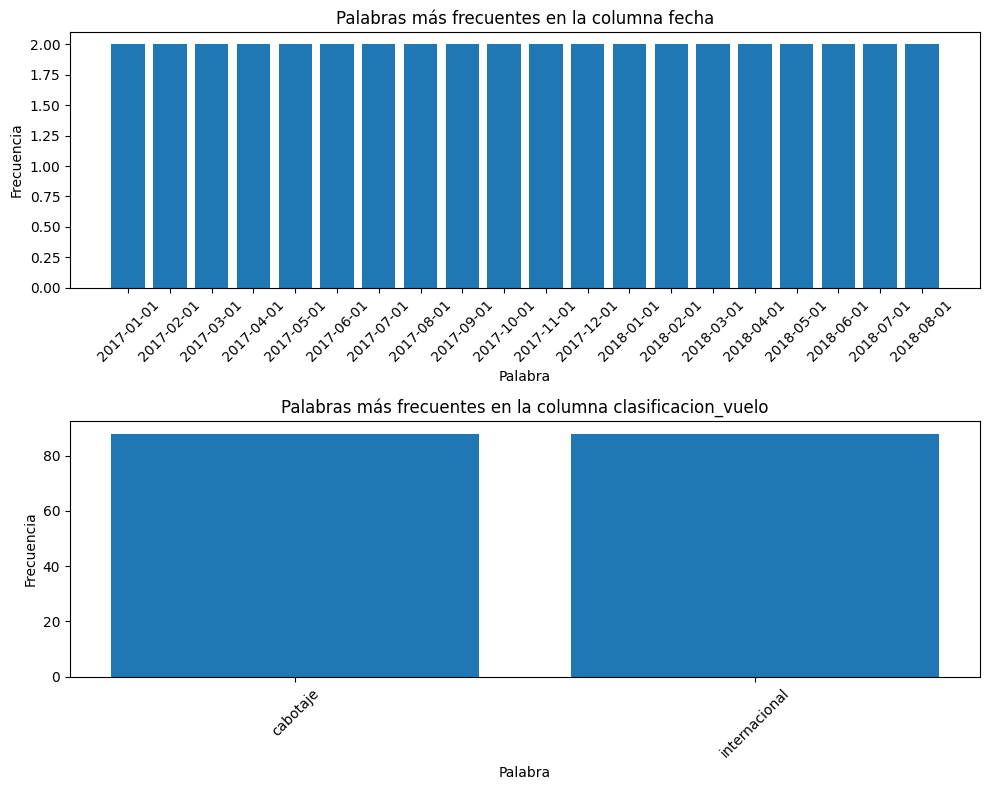

In [68]:
analisis_frecuencia_palabras(RUTAPORMES)

_Columnas Cuantitativas._

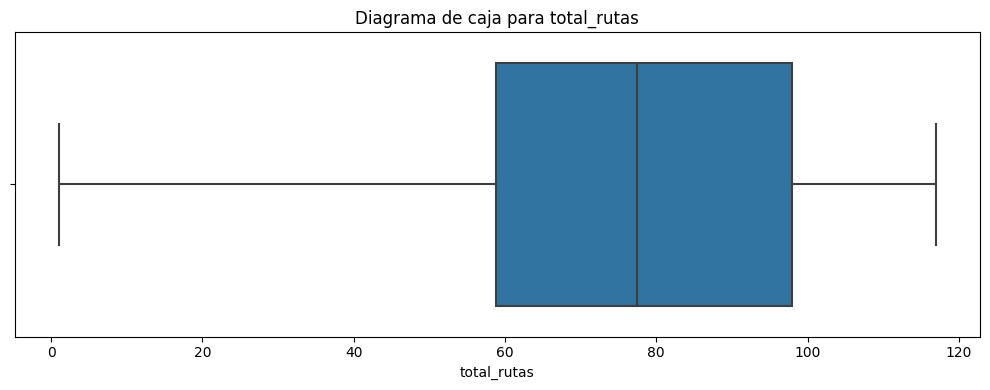

In [69]:
boxplots_numericas(RUTAPORMES)

- VISUALIZACIÓN DE VALORES DUPLICADOS.

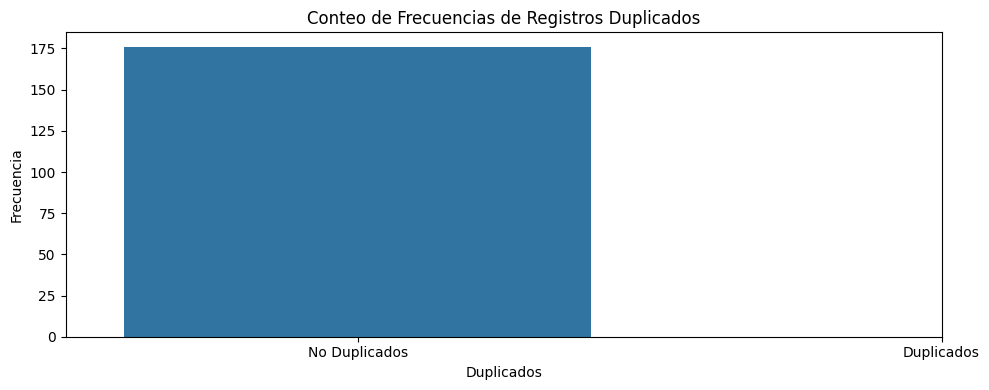

In [70]:
hist_duplicados(RUTAPORMES)

# <h1 align=center> VUELOSASIENTOPASAJERO </h1>

- INFORME DATAFRAME.

In [71]:
informe_dataframe(VUELOSASIENTOPASAJERO)

INFORME PRELIMINAR SOBRE CARACTERISTICAS DEL DATASET:

--Dimensiones del DataFrame--
Filas: 5233
Columnas: 5

--Numero de datos--
26165

--Filas y Columnas--
Filas: muestra de indices-------> [0, 1, 2, 3, 4]  -----> Desde 0  Hasta 5232
Columnas: ['fecha', 'clasificacion_vuelo', 'pasajeros', 'asientos', 'vuelos']

--Tipo de columnas--
fecha                  object
clasificacion_vuelo    object
pasajeros               int64
asientos                int64
vuelos                  int64
dtype: object

--Cantidad de registros duplicados--
0



'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~oo~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~'

- VERIFICAR TIPO DE DATOS.

In [72]:
verificar_tipo_datos(VUELOSASIENTOPASAJERO)

nombre_campo       tipo_datos  no_nulos_%  nulos_%  nulos
0                fecha  [<class 'str'>]       100.0      0.0      0
1  clasificacion_vuelo  [<class 'str'>]       100.0      0.0      0
2            pasajeros  [<class 'int'>]       100.0      0.0      0
3             asientos  [<class 'int'>]       100.0      0.0      0
4               vuelos  [<class 'int'>]       100.0      0.0      0

- INFORME DE COLUMNAS.

In [73]:
for columna in VUELOSASIENTOPASAJERO.columns:
    informe_columna(VUELOSASIENTOPASAJERO,columna)

INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE fecha:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
2667

--Valores unicos en la columna (Primeros 5 valores)--
['2017-01-01' '2017-01-02' '2017-01-03' '2017-01-04' '2017-01-05']

--Moda de la columna especificada--
Valor modal -----> 2017-01-01
Frecuencia acumulada ------> 2

--Distribucion de frecuencias (primeros valores con mayor cantidad de frecuencias)--
 fecha
2017-01-01    2
2021-11-27    2
2021-11-29    2
Name: count, dtype: int64

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
INFORME PRELIMINAR SOBRE LA COLUMNA/FEATURE clasificacion_vuelo:

--Numero de datos nulos--
0

--Cantidad de valores unicos en la columna--
2

--Valores unicos en la columna--
['Cabotaje' 'Internacional']

--Moda de la columna especificada

- VISUALIZACIÓN DE NULOS.

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shap

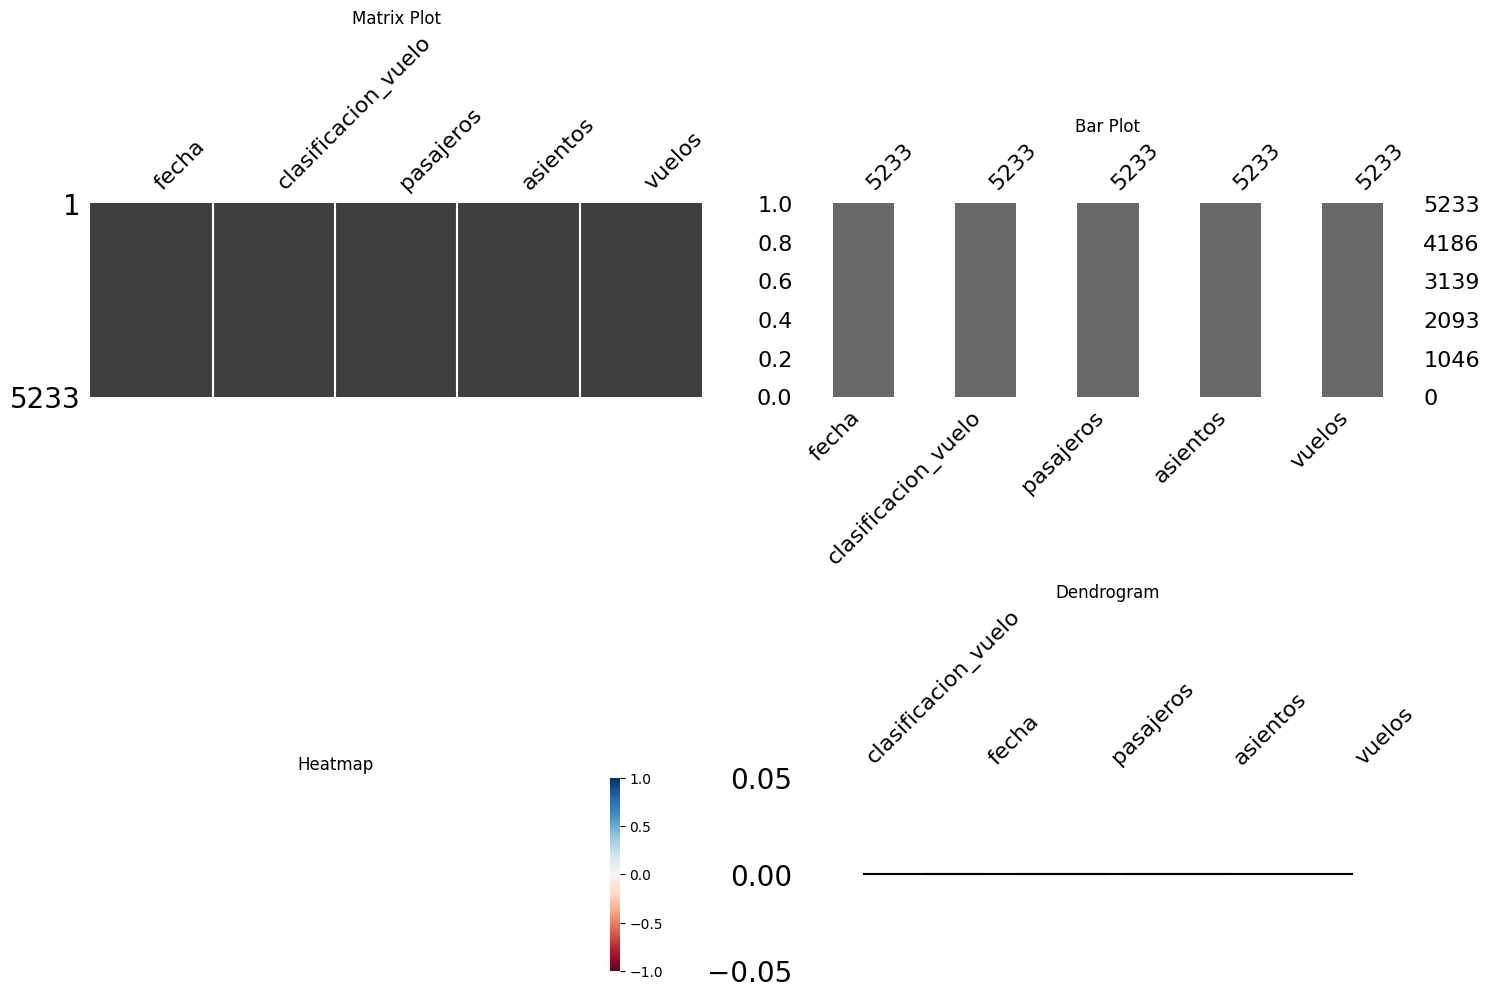

In [74]:
visualizar_nulos(VUELOSASIENTOPASAJERO)

- VISUALIZACIÓN DE VALORES ATÍPICOS, EXTREMOS Y OUTLIERS.

_Columnas Cualitativas._

c:\Users\LENOVO\Downloads\CONECTIVIDAD AÉREA\funciones.py:151: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([word for word, _ in palabras_mas_frecuentes], rotation=45)


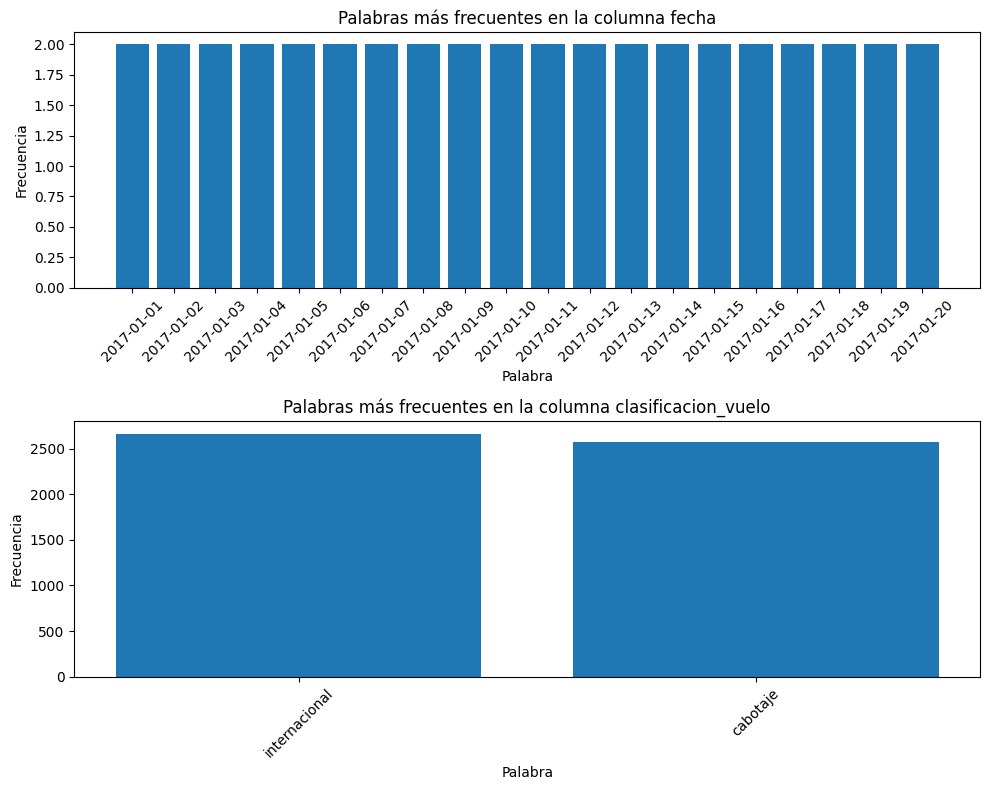

In [75]:
analisis_frecuencia_palabras(VUELOSASIENTOPASAJERO)

_Columnas Cuantitativas._

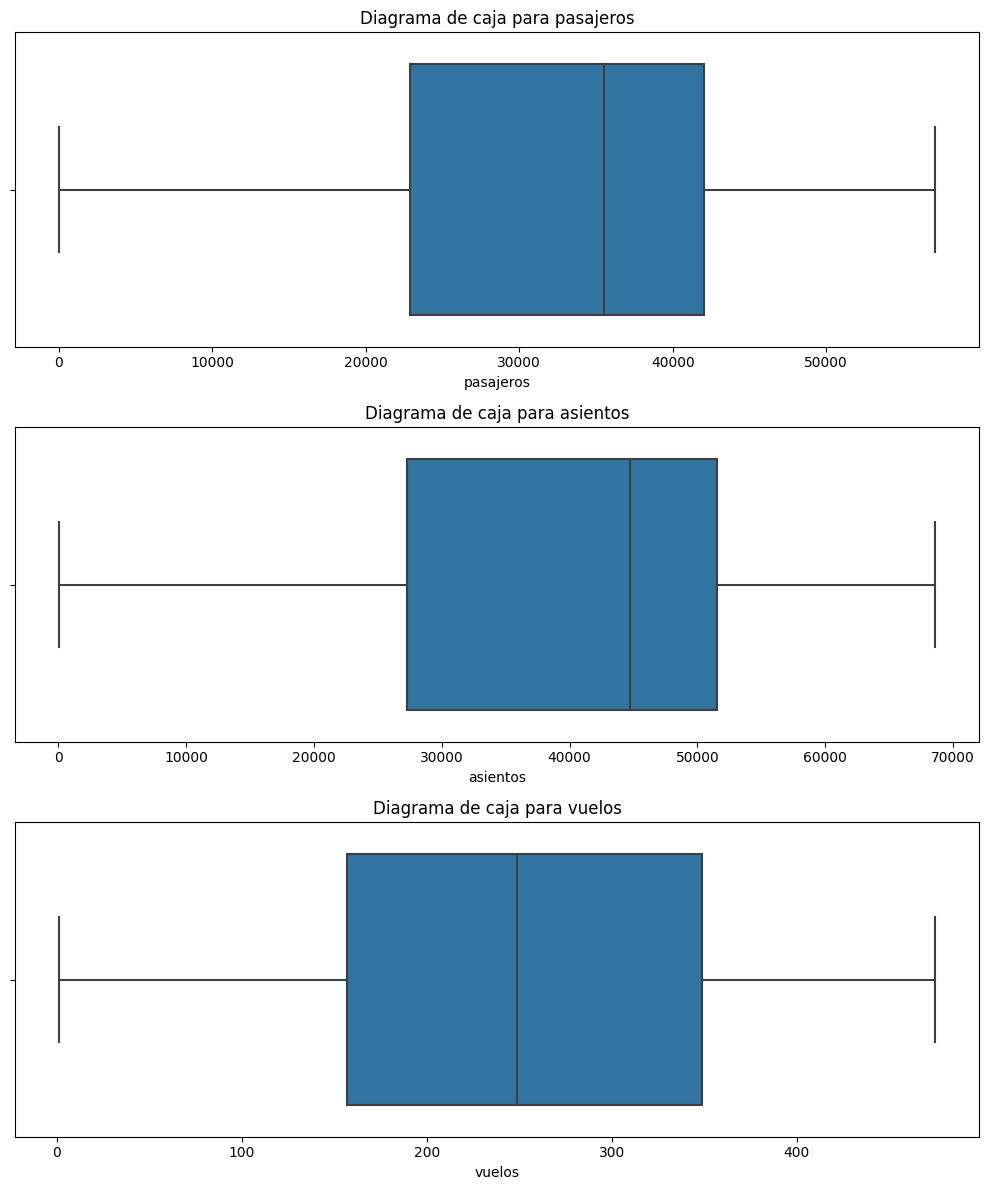

In [76]:
boxplots_numericas(VUELOSASIENTOPASAJERO)

- VISUALIZACIÓN DE VALORES DUPLICADOS.

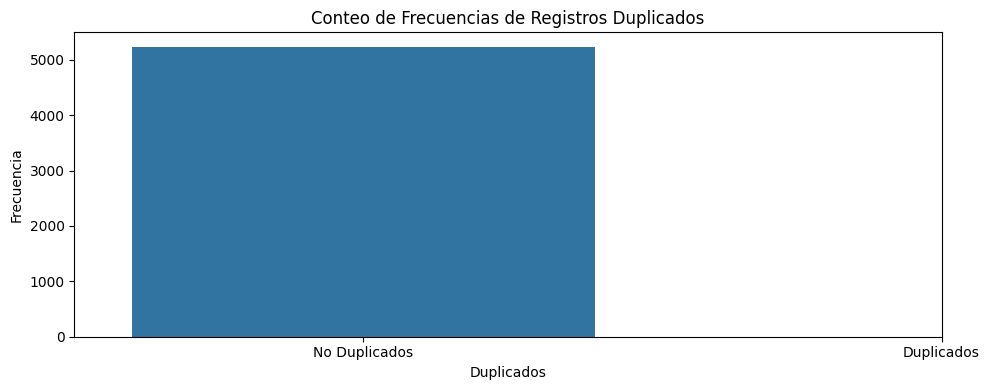

In [77]:
hist_duplicados(VUELOSASIENTOPASAJERO)

# **4.- CONCLUSIONES PRELIMINARES.**


- AEROLINEASPORTRIMESTRE

Tabla sin valores nulos, y su utilidad dependerá de la optimización que aporte a la visualización de datos en Power BI.



- AEROPUERTOS

No posee valores nulos, igualmente se prescindirá de ésta tabla ya que los datos reflejados se encuentrn más completos en el dataset "DATABASEGENERAL", aquí solamente obra información de los aeródromos localizados en el territorio argentino cuando además en los otros dataframes hay información de vuelos internacionales.



- DATABASEGENERAL

Como puede observarse, existe una fuerte correlación de valores nulos entre las columnas "origen_provincia" y "destino_provincia" y ello se corresponde con paises distintos a Argentina, por lo que se puede prescindir de dicha columna.

Por otra parte, existen 61 filas que tendrían valores duplicados en todas las columnas, por su cantidad se eliminarán del dataset por cuanto no incidirán en el resultado final de la información, ya que el tamaño original de la tabla es de 781648 líneas.

A su vez se observa que el presente dataframe nucléa la mayor cantidad de información útil para realizar un análisis acerca de la actividad aérea en la Argentina.



- MAGNITUDPORRUTA

Es una tabla que se encuentra en optimas condiciones para ser trabajada y puede ser de mucha utilidad su relación con el dataset "DATABASEGENERAL".



- PRINCIPALESAEREOSCABOTAJE.

Si bien es un dataframe que se encuentra completo y sin valores duplicados, la información inserta en él se halla en el dataset "DATABASEGENERAL", por cuanto en éste solo se limita a la información relacionada a los vuelos de cabotaje, dejando de lado aquellos denominados internacionales, por lo que sería una duplicación de información innecesaria.



- RUTAPORMES


Esta tabla se encuentra en optimas condiciones para ser trabajada su utilización dependerá del aporte optimo que pueda brindar para hacer gráficos en Power BI.



- VUELOSASIENTOPASAJERO

El presente dataset se encuentra en iguales condiciones que el anterior, por lo tanto su utilidad será evaluada al momento visualizar los datos en Power BI.